<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; In this Kaggle document we will handle the below strategies:
</div>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#load-dataset">☑ Load Data from <code>BoTnet 5% sample dataset</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#exploratory-data-analysis">☑ Exploratory data <code>analysis</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#default-features">☑ A baseline analysis for the dataset using all <code>default features</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#specific-features">☑ A baseline analysis for the dataset using <code>specific features</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#time-windowing-default">☑ A baseline analysis for the dataset using <code>time-windowing</code> and <code>default features</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#time-windowing-spectral">☑ A baseline analysis for the dataset using <code>time-windowing</code> and <code>spectral metrics features</code> 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#time-series-scanservice">☑ Timeseries analysis over <code>Service-Scan</code> attack 😃</a></p></blockquote>

<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;"><a href="#time-series-scanservice-balanced">☑ Timeseries analysis over  <code>Service-Scan</code> attack with <code>Balancing</code> 😃</a></p></blockquote>

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="load-dataset"></a>
    📌 First: Load Data
</div>


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📁 Datasets directory
</div>


In [1]:
verbose = True
very_verbose = False
eval_ML = True
eval_community = False
eval_spectral = False
eval_all = False

import os
for dirname, _, filenames in os.walk('/kaggle/input/train-test-dataset-ton'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/train-test-dataset-ton/Train_Test_Network_ton.csv


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    ⚙️ Working directory
</div>


In [2]:
print("working directory:") 
!pwd

working directory:
/kaggle/working


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🗃️ From dataset to dataframe
</div>


In [3]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

df_original_data = pd.read_csv("/kaggle/input/train-test-dataset-ton/Train_Test_Network_ton.csv")
if verbose:
    print(df_original_data.shape)

(461043, 45)


<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="exploratory-data-analysis"></a>
    📌 Second: Exploratory Data Analysis 
</div>

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🔨 Dataframe structure
</div>


In [4]:
if verbose :
    print(list(df_original_data.columns))
if very_verbose :
    print(df_original_data.dtypes)

['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri', 'http_version', 'http_request_body_len', 'http_response_body_len', 'http_status_code', 'http_user_agent', 'http_orig_mime_types', 'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice', 'label', 'type']


In [5]:
df_original_data = df_original_data.query('src_ip != dst_ip')

In [6]:
print(df_original_data.query('src_ip == dst_ip'))

Empty DataFrame
Columns: [ts, src_ip, src_port, dst_ip, dst_port, proto, service, duration, src_bytes, dst_bytes, conn_state, missed_bytes, src_pkts, src_ip_bytes, dst_pkts, dst_ip_bytes, dns_query, dns_qclass, dns_qtype, dns_rcode, dns_AA, dns_RD, dns_RA, dns_rejected, ssl_version, ssl_cipher, ssl_resumed, ssl_established, ssl_subject, ssl_issuer, http_trans_depth, http_method, http_uri, http_version, http_request_body_len, http_response_body_len, http_status_code, http_user_agent, http_orig_mime_types, http_resp_mime_types, weird_name, weird_addl, weird_notice, label, type]
Index: []

[0 rows x 45 columns]


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🧱 Decompose attack labels from categories
</div>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Note: attack categories must be initiated according to dataset features.
</div>

In [7]:
binary_label = 'label'
# attack_cat_label = 'category'
attack_label = 'type'

binary_label_count = df_original_data[binary_label].value_counts()
# attack_cat_label_count = df_original_data[attack_cat_label].value_counts()
attack_label_count = df_original_data[attack_label].value_counts()

attacks = df_original_data[binary_label].unique()
categories = df_original_data[attack_label].unique()
# subcategories = df_original_data[attack_label].unique()

if verbose :
    print(attacks)
    print(categories)
    # print(subcategories)

[0 1]
['normal' 'scanning' 'dos' 'injection' 'ddos' 'password' 'xss'
 'ransomware' 'backdoor' 'mitm']


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📊 Attack information 
</div>


label
0    218540
1    161043
Name: count, dtype: int64 

type
normal        218540
scanning       20000
dos            20000
injection      20000
ddos           20000
password       20000
xss            20000
ransomware     20000
backdoor       20000
mitm            1043
Name: count, dtype: int64 



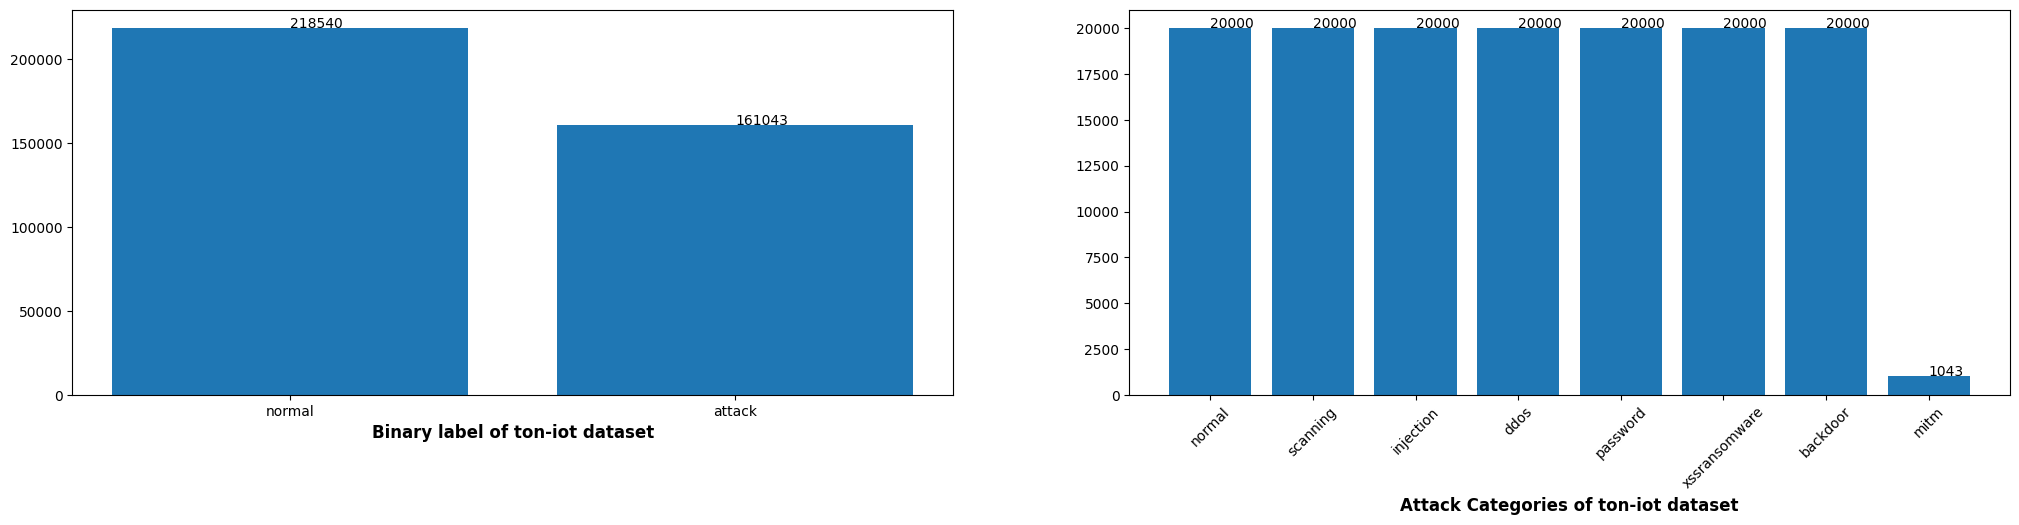

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
#get the count of the attack labels and attack categories 
binary_label_count = df_original_data[binary_label].value_counts()
attack_cat_label_count = df_original_data[attack_label].value_counts()

#print labels and attack categories/subcategories
print(binary_label_count,'\n')
print(attack_cat_label_count,'\n')

plt.figure(figsize=(25, 5))

#plot binary label
axs = plt.subplot(1, 2, 1)
x = ['normal','attack']
y = [binary_label_count[0],binary_label_count[1]]
plt.bar(x, y)
plt.xlabel('Binary label of ton-iot dataset', fontweight='bold', color = 'black',
           fontsize='12', horizontalalignment='center')
addlabels(x, y)


#plot attack categories
axs = plt.subplot(1, 2, 2)
x = ['normal','scanning','injection','ddos','password','xss'
 'ransomware','backdoor','mitm']
y = [attack_cat_label_count[1],attack_cat_label_count[2]
    ,attack_cat_label_count[4],attack_cat_label_count[5]
    ,attack_cat_label_count[6],attack_cat_label_count[7]
    ,attack_cat_label_count[8],attack_cat_label_count[9]]
plt.bar(x,y)
plt.xticks(rotation=45) 
plt.xlabel('Attack Categories of ton-iot dataset', fontweight='bold',
           color = 'black',
           fontsize='12', horizontalalignment='center')
addlabels(x, y)


plt.show()

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🔵➖😈➖🔵 Visualize interactions (graphs)
</div>


In [9]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import igraph as ig

def extract_graph(dataset, graph_type, label, src_addr, daddr, sport=0, dst_port=0, smac=0, dst_mac=0):

    """ Extract the graph attack according to the type we need to show

        Parameters
        ----------
        dataset: dataset, graph_type: type of graph we need to show (ip, ip + proto, or ip + mac),
        label: label of the attack, src_addr: source ip, daddr: destination ip, sport: source port,
        dst_port: destination port, smac: source mac, dst_mac: destination mac

        Returns
        -------
        graph of nodes and edges , attack_list for the type of attack found on the edge between two nodes (ip sources) ,
         attack_labels for the label of the attacks in the dataset
        """

    format_supported = True
    if graph_type == 'ip':
        dataset['source_node'] = dataset[src_addr]
        dataset['dst_node'] = dataset[daddr]
    else:
        if graph_type == 'ip_proto':
            comp_field1 = sport
            comp_field2 = dst_port
        elif graph_type == 'mac':
            comp_field1 = smac
            comp_field2 = dst_mac
        else:
            format_supported = False
        if format_supported:
            dataset['source_node'] = dataset[src_addr] + ':' + dataset[comp_field1].astype(str)
            dataset['dst_node'] = dataset[daddr] + ':' + dataset[comp_field2].astype(str)
        else:
            print('Graph type not supported :' + graph_type)

    dataset['edge'] = dataset['source_node'] + ':' + dataset['dst_node']
    dataset['edge_label'] = dataset[sport].astype(str) + ':' + dataset[dst_port].astype(str) + ':' + dataset[label].astype(str)
    graph = nx.Graph()
    # pos = nx.layout.spring_layout(graph)
    sip_list = dataset['source_node']
    dip_list = dataset['dst_node']
    ip_list = [*sip_list, *dip_list]

    graph.add_nodes_from(ip_list)
    attack_labels = dataset[label]
    edge_label_list = dataset['edge_label']

    attack_list = []

    for u, v, d in zip(sip_list, dip_list, edge_label_list):
        # graph.add_edge(u, v, label=d)
        label = d.split(':')[2]
        colors = {
            0: 'blue',
            1: 'red',
        }
        color = colors[int(label[0])]
        graph.add_edge(u, v, label=d, color=color)

    for k, v, d in graph.edges(data=True):
        attack_list.append(d['label'].split(':')[2])

    return graph, attack_list, attack_labels

def show_graph(graph):

    """ Show the graph we extracted as nodes and edges in networkx

        Parameters
        ----------
        graph : graph with nodes and edges

        Returns
        -------
        display a graph with nodes and edges using networkx
        """
    

    if(graph.number_of_nodes() > 3000):
        sampled_edges = random.sample(graph.eg, 3000)
        sampled_graph = graph.subgraph(sampled_nodes)
        plt.figure(figsize=(200, 80))
        pos = nx.layout.spring_layout(sampled_graph)
        colors = [sampled_graph[u][v]['color'] for u, v in sampled_graph.edges()]
        nx.draw_networkx(sampled_graph,edge_color=colors,pos = pos)
        plt.show()
    else:
        plt.figure(figsize=(200, 80))
        pos = nx.layout.spring_layout(graph)
        colors = [graph[u][v]['color'] for u, v in graph.edges()]
        nx.draw_networkx(graph,edge_color=colors,pos = pos)
        plt.show()
        
def show_graph2(graph):
    
    if(graph.number_of_nodes() > 3000):
        sampled_edges = random.sample(graph.edges, 3000)
        sampled_graph = graph.edge_subgraph(sampled_edges)
        G=ig.Graph.from_networkx(sampled_graph)
        N = sampled_graph.number_of_nodes()
    else:
        G=ig.Graph.from_networkx(graph)
        N = graph.number_of_nodes()
    E=[e.tuple for e in G.es]# list of edges
    layt=G.layout('fr') 
    type(layt)
    
    Xn=[layt[k][0] for k in range(N)]
    Yn=[layt[k][1] for k in range(N)]
    Xe=[]
    Ye=[]
    for e in E:
        Xe+=[layt[e[0]][0],layt[e[1]][0], None]
        Ye+=[layt[e[0]][1],layt[e[1]][1], None]

    trace1=go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line= dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   )
    trace2=go.Scatter(x=Xn,
                   y=Yn,
                   mode='markers',
                   name='ntw',
                   marker=dict(symbol='circle-dot',
                                            size=5,
                                            color='#6959CD',
                                            line=dict(color='rgb(50,50,50)', width=0.5)
                                            ),
                   hoverinfo='text'
                   )
    
    fig = go.Figure(data=[trace1, trace2],
             layout=go.Layout(
                title='<br>Graph of the network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
    fig.show()

In [10]:
from time import gmtime, strftime
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))
graph, attack_list, attack_labels = extract_graph(df_original_data, 'ip', 'label', 'src_ip', 'dst_ip',
                                                  'src_port', 'dst_port')
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))
show_graph2(graph)
print (strftime("%Y-%m-%d %H:%M:%S", gmtime()))

2024-02-20 00:07:06
2024-02-20 00:07:08


2024-02-20 00:07:09


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    😈 Mapping attack categories 
</div>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Note: Create a mapping dictionary for attack categories / this data may differ from a dataset to another.
</div>

In [11]:
# df_original_data = df_original_data[df_original_data['type'].isin(['normal','scanning','injection','ddos','password','xss', 'ransomware','backdoor','mitm'])]
map_dict= {
    'normal': 0,
    'scanning': 1,
    'dos': 2,
    'ddos': 3,
    'ransomware': 4,
    'injection': 5,
    'password': 6,
    'xss': 7,
    'backdoor':8,
    'mitm':9
    
}

# Replace the values in the 'subcategory' column using the mapping dictionary
targets_labels = df_original_data[attack_label]
df_for_learning = df_original_data.copy()
df_for_learning[attack_label] = df_for_learning[attack_label].replace(map_dict)
is_attack = df_for_learning[binary_label]
# category_label = df_for_learning[attack_cat_label]
targets_num = df_for_learning[attack_label]

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🔀 Transform categories to codes
</div>


In [12]:
# Convert the 'proto' column to category type
# df_for_learning['proto'] = df_for_learning['proto'].astype('category')
# Create a new column with proto Id(s)
# df_for_learning['proto_id'] = df_for_learning['proto'].cat.codes

print(df_for_learning)

                ts         src_ip  src_port         dst_ip  dst_port proto  \
0       1554198358    3.122.49.24      1883  192.168.1.152     52976   tcp   
1       1554198358   192.168.1.79     47260  192.168.1.255     15600   udp   
4       1554198362  192.168.1.152     46608  192.168.1.190        53   udp   
5       1554198364   192.168.1.79     33269  192.168.1.255     15600   udp   
10      1554198370   192.168.1.79     37498  192.168.1.255     15600   udp   
...            ...            ...       ...            ...       ...   ...   
461038  1556340862   192.168.1.32     33108  176.28.50.165        80   tcp   
461039  1556423390   192.168.1.33     37242  34.230.157.88       443   tcp   
461040  1556436603   192.168.1.37      4444  192.168.1.193     49178   tcp   
461041  1556540442   192.168.1.31     60816  104.98.29.100       443   tcp   
461042  1556540442   192.168.1.31     41054  151.101.24.64       443   tcp   

       service      duration  src_bytes  dst_bytes  ... http_re

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    ❌ Drop labels
</div>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Drop labels related to attack binary labels, categories and subcategories where these labels may change from dataset to another
</div>

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🧱 Decompose the features into <b>numeric feautures</b> and <b>categorical features</b>
</div>


In [13]:
import numpy as np
df_numerical_data = df_for_learning.select_dtypes(np.number)
df_categorical_data = df_for_learning.select_dtypes(exclude=np.number)
print(df_numerical_data.columns)

Index(['ts', 'src_port', 'dst_port', 'duration', 'src_bytes', 'dst_bytes',
       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'label', 'type'],
      dtype='object')


In [14]:
#df_numerical_data = df_for_learning[['src_port', 'dst_port', 'duration', 'src_bytes', 'dst_bytes',
#       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
#       'dns_qclass', 'dns_qtype', 'dns_rcode', 'http_request_body_len',
#       'http_response_body_len', 'http_status_code']]

In [15]:
df_scores = pd.DataFrame(columns=['attack_type', 'attack_label', 'approach_name', 'classifier', 'f1_score', 'balanced_accuracy', 'MCC','Precision', 'Recall', 'order'])
print(type(df_scores))


<class 'pandas.core.frame.DataFrame'>


<div class="alert alert-block alert-info" style="font-size:50px; font-family:verdana; color:white;background-color:green;">
    <a id="approaches"></a>
    📌 Approaches
</div>


<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:lightgreen;">
    <a id="default-features"></a>
    📌 Approach 1: Whole dataset with all features
</div>

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🧱 Show full numerical and categorical features
</div>


In [16]:
if verbose:
    print(df_numerical_data.columns)
    print(df_categorical_data.columns)

Index(['ts', 'src_port', 'dst_port', 'duration', 'src_bytes', 'dst_bytes',
       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'label', 'type'],
      dtype='object')
Index(['src_ip', 'dst_ip', 'proto', 'service', 'conn_state', 'dns_query',
       'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version',
       'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject',
       'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri',
       'http_version', 'http_user_agent', 'http_orig_mime_types',
       'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice',
       'source_node', 'dst_node', 'edge', 'edge_label'],
      dtype='object')


In [17]:
df_for_learning = df_for_learning.drop(labels=[binary_label,attack_label], axis=1)


<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🧱 Split the dataframe into <b>Train</b> and <b>Test</b> samples
</div>


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_numerical_data,targets_num,test_size=0.3, train_size=0.7,random_state=42)

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📈 Visualize feature values (euclidian data)
</div>


In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(y_train)
   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

106777    0
233804    0
236591    0
192823    5
171771    2
         ..
340638    0
447298    8
213388    3
228323    3
203414    5
Name: type, Length: 265708, dtype: int64


normal:b
scanning:g
dos:c
injection:m
ddos:y
password:k
xss:r
ransomware:b
backdoor:g
mitm:c


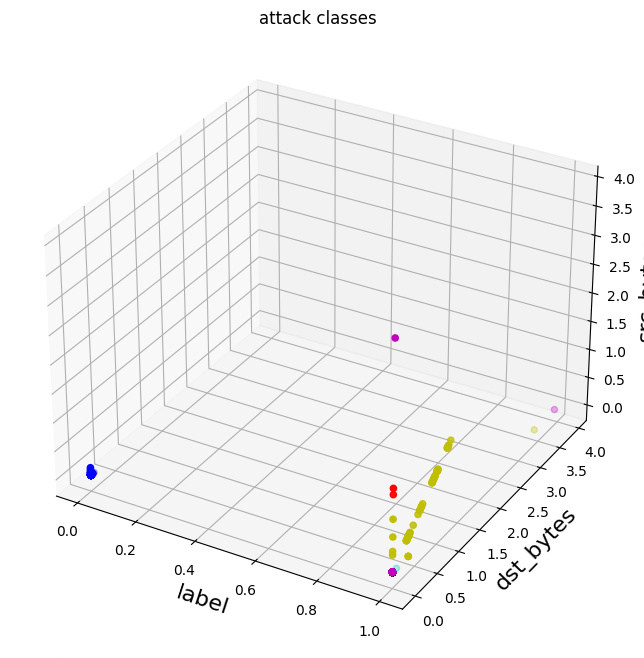

In [20]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto") # gpu_hist
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📈 Plot feature importance
</div>


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Note: Feature importance are plotted depending on the XGBoost classifer
</div>

In [21]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [22]:
def plot_lesser_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-5:][::-2]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')
# plot_lesser_gain_features(clf)

In [23]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

normal:b
scanning:g
dos:c
injection:m
ddos:y
password:k
xss:r
ransomware:b
backdoor:g
mitm:c


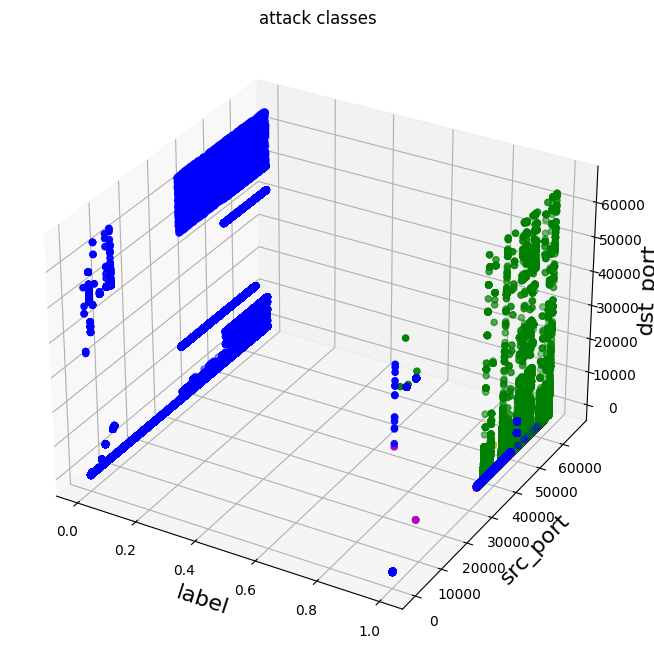

In [24]:
def plot_lesser_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-7:][::-3]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')
plot_lesser_gain_features(clf)

normal:b
scanning:g
dos:c
injection:m
ddos:y
password:k
xss:r
ransomware:b
backdoor:g
mitm:c


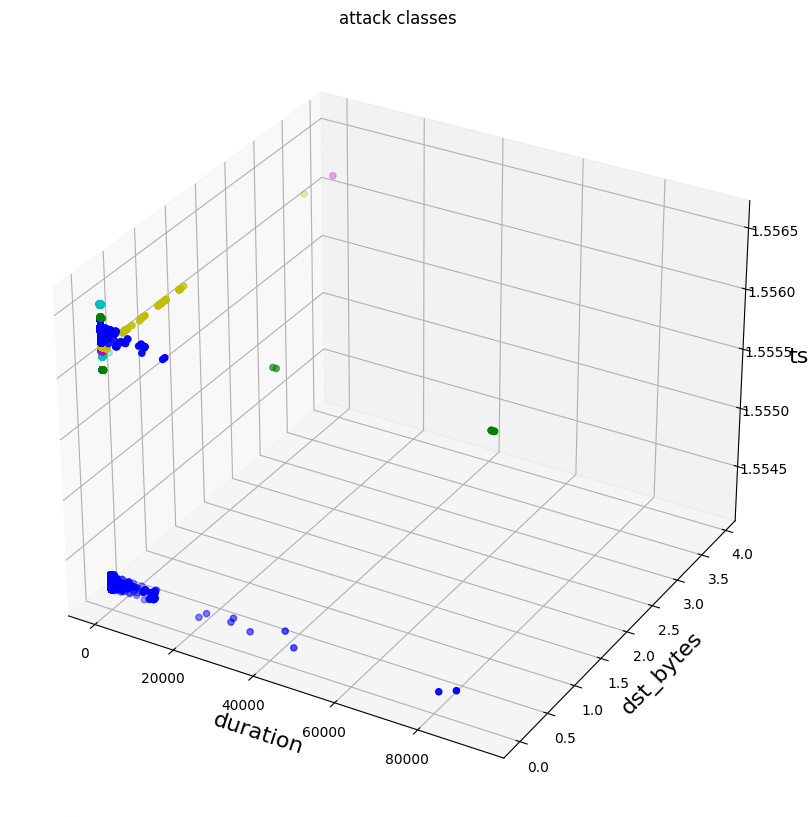

In [25]:
def plot_attacks_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (10, 12))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat or target == 'blacklist':
            color='b'
        else:
            color=c[c_index%len(c)]

            print(target+":"+color)
            ax.scatter(x_data, y_data, z_data, c=color)
            c_index=c_index+1

    plt.show()

def plot_other_gain_features(clf,a,b,c):
    
    x, y, z = a,b,c
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_attacks_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'background')
plot_other_gain_features(clf,3,5,0)

normal:b
scanning:g
dos:c
injection:m
ddos:y
password:k
xss:r
ransomware:b
backdoor:g
mitm:c


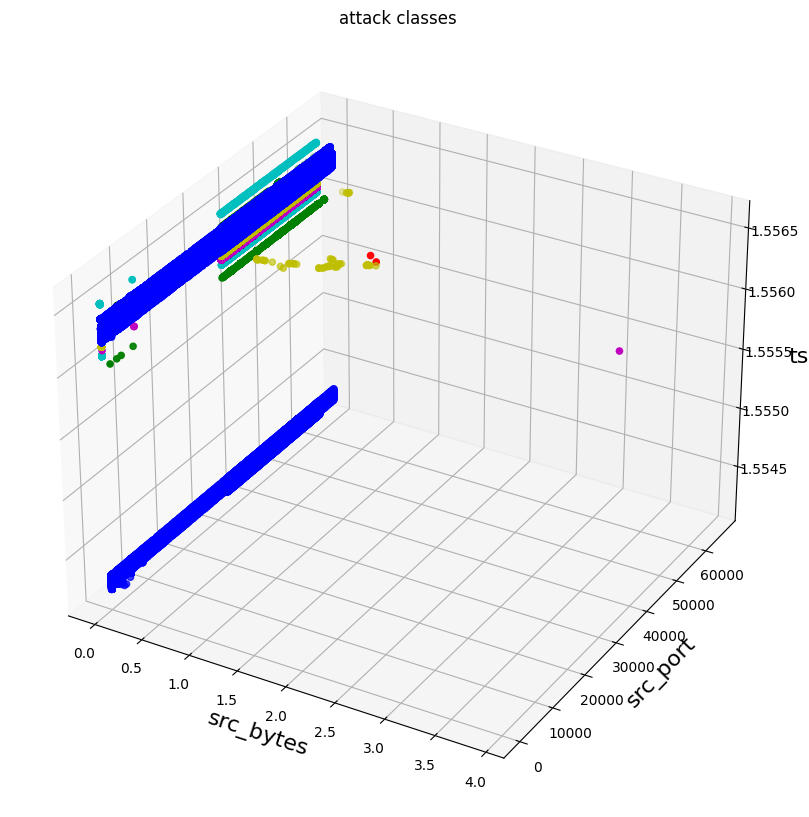

In [26]:
plot_other_gain_features(clf,4,1,0)

normal:b
scanning:g
dos:c
injection:m
ddos:y
password:k
xss:r
ransomware:b
backdoor:g
mitm:c


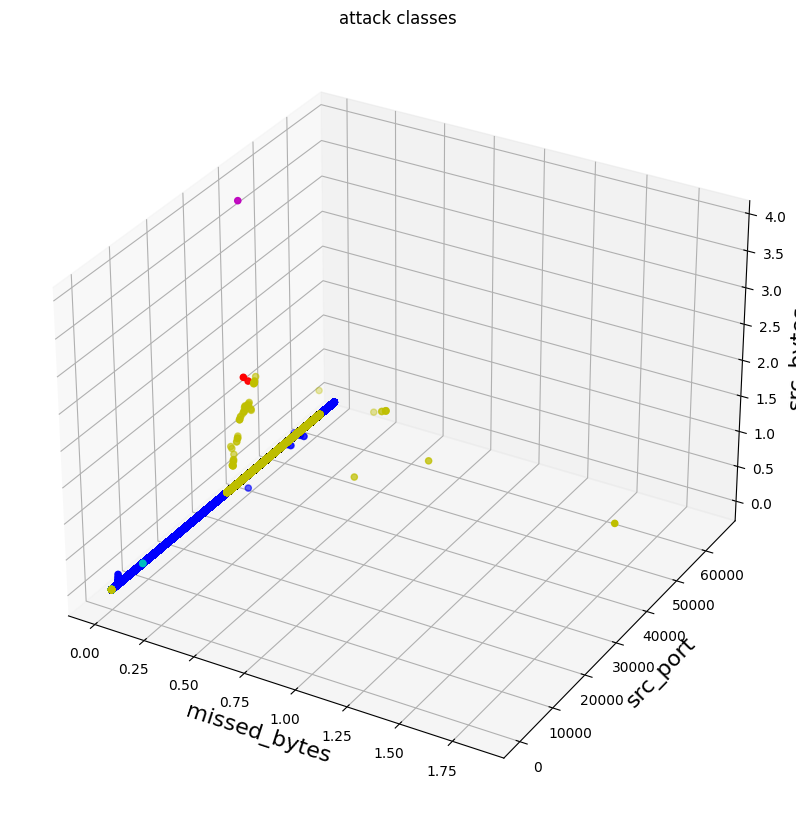

In [27]:
plot_other_gain_features(clf,6,1,4)

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    🔴🔵 Apply ML classification models
</div>


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    ##"Nearest Neighbors",
    "Decision Tree",
    ##"Random Forest",
    ##"Bagging",
    ##"Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    ##"MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [##KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               ##RandomForestClassifier(max_depth=3, random_state=0),
               ##BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

<div class="alert alert-block alert-warning" style="font-size:14px; font-family:verdana; color:black;background-color:light-gray;">
    <a id="Files-directory"></a>
    📊 Extract classification accuracy metrics
</div>


In [29]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import numpy as np

def classwise_balanced_accuracy(y_test, pred_target, num_classes):
    class_balanced_accuracy = {}
    
    for cls in range(num_classes):
        true_positive = np.sum((y_test == cls) & (pred_target == cls))
        false_positive = np.sum((y_test != cls) & (pred_target == cls))
        true_negative = np.sum((y_test != cls) & (pred_target != cls))
        false_negative = np.sum((y_test == cls) & (pred_target != cls))
        
        sensitivity = true_positive / (true_positive + false_negative)
        specificity = true_negative / (true_negative + false_positive)
        
        balanced_accuracy = (sensitivity + specificity) / 2
        class_balanced_accuracy[cls] = balanced_accuracy
    
    return class_balanced_accuracy

def classwise_mcc(y_test, pred_target, num_classes):
    class_mcc = {}
    
    for cls in range(num_classes):
        true_positive = np.sum((y_test == cls) & (pred_target == cls))
        false_positive = np.sum((y_test != cls) & (pred_target == cls))
        true_negative = np.sum((y_test != cls) & (pred_target != cls))
        false_negative = np.sum((y_test == cls) & (pred_target != cls))
        
        numerator = (true_positive * true_negative) - (false_positive * false_negative)
        denominator = np.sqrt((true_positive + false_positive) * (true_positive + false_negative) * (true_negative + false_positive) * (true_negative + false_negative))
        
        # Handling the case when the denominator is zero
        if denominator == 0:
            mcc = 0
        else:
            mcc = numerator / denominator
        
        class_mcc[cls] = mcc
    
    return class_mcc

In [30]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]

    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    print(class_mcc)
    
    approach_name = 'OD (numerical features)'
    priority = 1
    df_scores.loc[len(df_scores.index)] = ['Scanning',
                                           1,
                                           approach_name,
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DoS',
                                           2,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           3,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Ransomware',
                                           4,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Injection',
                                           5,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['f1-score'],
                                           class_balanced_accuracies.get(5, "Class not found"),
                                           class_mcc.get(5, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Password',
                                           6,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['f1-score'],
                                           class_balanced_accuracies.get(6, "Class not found"),
                                           class_mcc.get(6, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['XSS',
                                           7,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['f1-score'],
                                           class_balanced_accuracies.get(7, "Class not found"),
                                           class_mcc.get(7, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Backdoor',
                                           8,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['f1-score'],
                                           class_balanced_accuracies.get(8, "Class not found"),
                                           class_mcc.get(8, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['MitM',
                                           9,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['f1-score'],
                                           class_balanced_accuracies.get(9, "Class not found"),
                                           class_mcc.get(9, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['recall'],
                                           priority]
    
    
    
    for cls, bal_acc in class_balanced_accuracies.items():
         print(f'Class_{cls}', cls, ' Balanced Accuracy ', type(classifier).__name__, ' ', bal_acc)
    #     df_scores.loc[len(df_scores.index)] = [f'Class_{cls}', cls, 'Balanced Accuracy', type(classifier).__name__, bal_acc, 5]
        
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [31]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [32]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: DecisionTree
2024-02-20 00:08:23.021106
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}
{0: nan, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}
Class_0 0  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_1 1  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_2 2  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_3 3  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_4 4  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_5 5  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_6 6  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_7 7  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_8 8  Balanced Accuracy  DecisionTreeClassifier   1.0
Class_9 9  Balanced Accuracy  DecisionTreeClassifier   1.0
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier

In [33]:
if verbose:
    show_eval()

     Classifier  Precision  Recall  TNR  TPR  Accuracy  F1_score  \
0  DecisionTree        1.0     1.0  1.0  1.0       1.0       1.0   
1           XGB        1.0     1.0  1.0  1.0       1.0       1.0   

   Balanced_accuracy  MCC  Error               fit_time              pred_time  
0                1.0  1.0    0.0 0 days 00:00:00.722494 0 days 00:00:00.010214  
1                1.0  1.0    0.0 0 days 00:00:34.635587 0 days 00:00:00.124680  


In [34]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [35]:
plot_evals('/kaggle/working/eval/output_numeric_only')

In [36]:
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')

In [37]:
plot_confusion_matrixes("eval/output_numeric_only_report")

In [38]:
print(df_scores)

   attack_type  attack_label            approach_name              classifier  \
0     Scanning             1  OD (numerical features)  DecisionTreeClassifier   
1          DoS             2  OD (numerical features)  DecisionTreeClassifier   
2         DDoS             3  OD (numerical features)  DecisionTreeClassifier   
3   Ransomware             4  OD (numerical features)  DecisionTreeClassifier   
4    Injection             5  OD (numerical features)  DecisionTreeClassifier   
5     Password             6  OD (numerical features)  DecisionTreeClassifier   
6          XSS             7  OD (numerical features)  DecisionTreeClassifier   
7     Backdoor             8  OD (numerical features)  DecisionTreeClassifier   
8         MitM             9  OD (numerical features)  DecisionTreeClassifier   
9     Scanning             1  OD (numerical features)           XGBClassifier   
10         DoS             2  OD (numerical features)           XGBClassifier   
11        DDoS             3

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:lightgreen;">
    <a id="default-features"></a>
    📌 Approach 2: Full dataset with dropping out time features
</div>

In [39]:
 print(df_numerical_data.columns)

Index(['ts', 'src_port', 'dst_port', 'duration', 'src_bytes', 'dst_bytes',
       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'label', 'type'],
      dtype='object')


In [40]:
df_numerical_data_filtered = df_numerical_data.drop(columns = ['ts','src_port', 'dst_port'], axis=1)
if verbose:
    print(df_numerical_data_filtered.columns)
    print(df_categorical_data.columns)

Index(['duration', 'src_bytes', 'dst_bytes', 'missed_bytes', 'src_pkts',
       'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype',
       'dns_rcode', 'http_request_body_len', 'http_response_body_len',
       'http_status_code', 'label', 'type'],
      dtype='object')
Index(['src_ip', 'dst_ip', 'proto', 'service', 'conn_state', 'dns_query',
       'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version',
       'ssl_cipher', 'ssl_resumed', 'ssl_established', 'ssl_subject',
       'ssl_issuer', 'http_trans_depth', 'http_method', 'http_uri',
       'http_version', 'http_user_agent', 'http_orig_mime_types',
       'http_resp_mime_types', 'weird_name', 'weird_addl', 'weird_notice',
       'source_node', 'dst_node', 'edge', 'edge_label'],
      dtype='object')


#### Split the dataframe into **Train** and **Test** subsets of df

In [41]:
df_numerical_data_filtered = df_numerical_data_filtered.drop(labels=[binary_label,attack_label], axis=1)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_numerical_data_filtered,targets_num,test_size=0.3, train_size=0.7,random_state=42)

#### Visualize feature values (euclidian data)

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_numerical_data_filtered.columns.tolist()[x]
    y_feature = df_numerical_data_filtered.columns.tolist()[y]
    z_feature = df_numerical_data_filtered.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data_filtered[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data_filtered[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data_filtered[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

In [44]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto")
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# plot_high_gain_features(clf)

#### Plot feature importance

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana;">
    📌 Feature importance are plotted depending on the XGBoost classifer
</div>

In [45]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

#### Apply ML classification models

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    ##"Nearest Neighbors",
    "Decision Tree",
    ##"Random Forest",
    ##"Bagging",
    ##"Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    ##"MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [##KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               ##RandomForestClassifier(max_depth=3, random_state=0),
               ##BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

#### Extract classification accuracy metrics

In [47]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'OD (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 2]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'OD (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 2]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'OD (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 2]
    
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    approach_name = 'OD (common_features)'
    priority = 2
    df_scores.loc[len(df_scores.index)] = ['Scanning',
                                           1,
                                           approach_name,
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DoS',
                                           2,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           3,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Ransomware',
                                           4,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Injection',
                                           5,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['f1-score'],
                                           class_balanced_accuracies.get(5, "Class not found"),
                                           class_mcc.get(5, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Password',
                                           6,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['f1-score'],
                                           class_balanced_accuracies.get(6, "Class not found"),
                                           class_mcc.get(6, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['XSS',
                                           7,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['f1-score'],
                                           class_balanced_accuracies.get(7, "Class not found"),
                                           class_mcc.get(7, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Backdoor',
                                           8,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['f1-score'],
                                           class_balanced_accuracies.get(8, "Class not found"),
                                           class_mcc.get(8, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['MitM',
                                           9,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['f1-score'],
                                           class_balanced_accuracies.get(9, "Class not found"),
                                           class_mcc.get(9, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['recall'],
                                           priority]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [48]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [49]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: DecisionTree
2024-02-20 00:10:55.345869
{0: 0.9859740268367001, 1: 0.9930111164453962, 2: 0.9903898949132153, 3: 0.9812439656487086, 4: 0.914514814662126, 5: 0.9790099543272053, 6: 0.9873507864200761, 7: 0.9397282112791943, 8: 0.9987792627620267, 9: 0.8126085674747524}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  DecisionTree   0.969117  0.968465  0.955676  0.987205  0.968465  0.968733   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.920526  0.951279  0.031535 0 days 00:00:01.110826   

               pred_time  
0 0 days 00:00:00.016738  
Evaluating: XGB
2024-02-20 00:11:00.676764
{0: 0.9867696587764171, 1: 0.9959928415563589, 2: 0.9902098169683039, 3: 0.9833341316459983, 4: 0.913111756752638, 5: 0.9808149886830214, 6: 0.9

In [50]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  DecisionTree   0.969117  0.968465  0.955676  0.987205  0.968465  0.968733   
1           XGB   0.972068  0.971091  0.959543  0.987887  0.971091  0.971463   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.920526  0.951279  0.031535 0 days 00:00:01.110826   
1           0.936048  0.955336  0.028909 0 days 00:01:43.687508   

               pred_time  
0 0 days 00:00:00.016738  
1 0 days 00:00:00.829042  


In [51]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [52]:
plot_evals('/kaggle/working/eval/output_numeric_only')

In [53]:
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')

In [54]:
plot_confusion_matrixes("eval/output_numeric_only_report")

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 3: Timeseries with default features
</div>


'flgs_number', 'proto_number', 'pkts', 'bytes', 'state_number', 'dur',
       'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP',
       'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
       'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
       'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'proto_id'

In [55]:
df_original_data_tmp = df_original_data.copy() 
df_original_data_tmp['weight'] = 1
df_to_sample = df_original_data_tmp.copy()
print(df_to_sample['type'].unique())

# df_to_sample = df_to_sample[(df_to_sample['category'] == 'Normal') | (df_to_sample['subcategory'] == 'Service_Scan')]
# print(df_to_sample['category'].unique())

if verbose:
    print(df_original_data_tmp.shape)

df_to_sample['datetime'] = pd.to_datetime(df_to_sample['ts'], unit='s')
# Extract columns
df_timeseries = df_to_sample[['ts', 'datetime', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'src_pkts', 'dst_pkts', 'src_bytes', 'dst_bytes',
                             'label', 'type', 'weight','duration']]
df_timeseries = df_timeseries.sort_values(by=['ts'])
# print(df[['stime', 'datetime', 'saddr', 'daddr','pkts', 'attack', 'weight']].head(50))

# Group by columns
df_timeseries = df_timeseries.groupby(['ts', 'datetime', 'src_ip', 'dst_ip'], as_index=False).agg({
    'src_pkts': 'sum', 'dst_pkts': 'sum', 'label': 'first', 'type':'first',
    'src_bytes': 'sum', 'dst_bytes': 'sum', 'duration':'mean', 'weight':'sum'})

print(df_timeseries.head(20))

if verbose:
    print(df_timeseries.shape)

df_timeseries_tmp = df_timeseries.copy()

['normal' 'scanning' 'dos' 'injection' 'ddos' 'password' 'xss'
 'ransomware' 'backdoor' 'mitm']
(379583, 50)
            ts            datetime         src_ip          dst_ip  src_pkts  \
0   1554198358 2019-04-02 09:45:58   192.168.1.79   192.168.1.255         1   
1   1554198358 2019-04-02 09:45:58    3.122.49.24   192.168.1.152    252181   
2   1554198362 2019-04-02 09:46:02  192.168.1.152   192.168.1.190         0   
3   1554198364 2019-04-02 09:46:04   192.168.1.79   192.168.1.255         1   
4   1554198370 2019-04-02 09:46:10   192.168.1.79   192.168.1.255         1   
5   1554198376 2019-04-02 09:46:16   192.168.1.79   192.168.1.255         1   
6   1554198377 2019-04-02 09:46:17  192.168.1.152   192.168.1.190         0   
7   1554198382 2019-04-02 09:46:22   192.168.1.79   192.168.1.255         1   
8   1554198388 2019-04-02 09:46:28   192.168.1.79   192.168.1.255         1   
9   1554198390 2019-04-02 09:46:30  192.168.1.152  172.217.167.67         1   
10  1554198392 2019-04

In [56]:
df_timeseries_tmp['type'] = df_timeseries_tmp['type'].replace(map_dict)

In [57]:
from sklearn.model_selection import train_test_split
targets_num = df_timeseries_tmp['type']
print(df_timeseries_tmp)
df_timeseries_tmp = df_timeseries_tmp.drop(columns = ['ts', 'type', 'datetime', 'src_ip', 'dst_ip', 'label', 'duration', 'weight'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_timeseries_tmp,targets_num,test_size=0.3, train_size=0.7,random_state=42)

                ts            datetime         src_ip         dst_ip  \
0       1554198358 2019-04-02 09:45:58   192.168.1.79  192.168.1.255   
1       1554198358 2019-04-02 09:45:58    3.122.49.24  192.168.1.152   
2       1554198362 2019-04-02 09:46:02  192.168.1.152  192.168.1.190   
3       1554198364 2019-04-02 09:46:04   192.168.1.79  192.168.1.255   
4       1554198370 2019-04-02 09:46:10   192.168.1.79  192.168.1.255   
...            ...                 ...            ...            ...   
154298  1556549027 2019-04-29 14:43:47   192.168.1.34  192.168.1.195   
154299  1556549048 2019-04-29 14:44:08   192.168.1.34  192.168.1.169   
154300  1556549053 2019-04-29 14:44:13   192.168.1.34    192.168.1.1   
154301  1556549121 2019-04-29 14:45:21   192.168.1.34  52.255.57.151   
154302  1556549129 2019-04-29 14:45:29   192.168.1.34  192.168.1.169   

        src_pkts  dst_pkts  label  type  src_bytes  dst_bytes      duration  \
0              1         0      0     0          0      

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

In [59]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto")
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# plot_high_gain_features(clf)

In [60]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    ##"Nearest Neighbors",
    "Decision Tree",
    ##"Random Forest",
    ##"Bagging",
    ##"Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    ##"MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [##KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               ##RandomForestClassifier(max_depth=3, random_state=0),
               ##BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

In [62]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'Timeseries (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 3]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'Timeseries (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 3]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'Timeseries (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 3]
    
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    
    approach_name = 'Timeseries (pkts_features)'
    priority = 3
    df_scores.loc[len(df_scores.index)] = ['Scanning',
                                           1,
                                           approach_name,
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DoS',
                                           2,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           3,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Ransomware',
                                           4,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Injection',
                                           5,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['f1-score'],
                                           class_balanced_accuracies.get(5, "Class not found"),
                                           class_mcc.get(5, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Password',
                                           6,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['f1-score'],
                                           class_balanced_accuracies.get(6, "Class not found"),
                                           class_mcc.get(6, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['XSS',
                                           7,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['f1-score'],
                                           class_balanced_accuracies.get(7, "Class not found"),
                                           class_mcc.get(7, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Backdoor',
                                           8,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['f1-score'],
                                           class_balanced_accuracies.get(8, "Class not found"),
                                           class_mcc.get(8, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['MitM',
                                           9,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['f1-score'],
                                           class_balanced_accuracies.get(9, "Class not found"),
                                           class_mcc.get(9, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['recall'],
                                           priority]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [63]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [64]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: DecisionTree
2024-02-20 00:13:16.123591
{0: 0.8703179192251498, 1: 0.6113747096354333, 2: 0.9430731997635923, 3: 0.7748198312092978, 4: 0.5983011727195301, 5: 0.9100008386318919, 6: 0.9500549692648286, 7: 0.7735366532715873, 8: 0.8928612905637772, 9: 0.7053039029533539}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  DecisionTree   0.905049  0.911948  0.950061  0.716198  0.911948  0.900097   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.634483  0.724998  0.088052 0 days 00:00:00.166729   

               pred_time  
0 0 days 00:00:00.005163  
Evaluating: XGB
2024-02-20 00:13:17.592003
{0: 0.8672903893359424, 1: 0.610273605444699, 2: 0.9403860505541315, 3: 0.7628835833074408, 4: 0.5973448494245595, 5: 0.9040006627759186, 6: 0.

In [65]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  DecisionTree   0.905049  0.911948  0.950061  0.716198  0.911948  0.900097   
1           XGB   0.906693  0.913979  0.954449  0.708240  0.913979  0.901444   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.634483  0.724998  0.088052 0 days 00:00:00.166729   
1           0.630353  0.729820  0.086021 0 days 00:00:23.414965   

               pred_time  
0 0 days 00:00:00.005163  
1 0 days 00:00:00.312612  


In [66]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [67]:
plot_evals('/kaggle/working/eval/output_numeric_only')

In [68]:
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')

In [69]:
plot_confusion_matrixes("eval/output_numeric_only_report")

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 4: Timewindowing with default features
</div>


In [70]:
"""""""""
df_original_data_tmp = df_original_data.copy() 
df_original_data_tmp['weight'] = 1
df_to_sample = df_original_data_tmp.copy()
print(df_to_sample['category'].unique())

# df_to_sample = df_to_sample[(df_to_sample['category'] == 'Normal') | (df_to_sample['subcategory'] == 'Data_Exfiltration')| (df_to_sample['subcategory'] == 'OS_Fingerprint')| (df_to_sample['subcategory'] == 'UDP')| (df_to_sample['subcategory'] == 'Keylogging')]
# print(df_to_sample['category'].unique())

if verbose:
    print(df_original_data_tmp.shape)

df_to_sample['datetime'] = pd.to_datetime(df_to_sample['stime'], unit='s')
# Extract columns
df_timeseries = df_to_sample[['stime', 'datetime', 'saddr', 'daddr', 'sport', 'dport', 'pkts', 'bytes',
                             'rate', 'attack', 'category', 'subcategory', 'weight','dur', 'mean', 'sum', 'min', 'max', 'spkts', 'dpkts', 'srate', 'drate',
                             'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
                             'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
                              'Pkts_P_State_P_Protocol_P_SrcIP']]
df_timeseries = df_timeseries.sort_values(by=['stime'])
# print(df[['stime', 'datetime', 'saddr', 'daddr','pkts', 'attack', 'weight']].head(50))

# Group by columns
df_timeseries = df_timeseries.groupby(['stime', 'datetime', 'saddr', 'daddr'], as_index=False).agg({
    'pkts': 'sum', 'bytes': 'sum', 'attack': 'first', 'category':'first', 'subcategory':'first',
    'rate': 'mean', 'dur': 'mean', 'mean':'mean', 'sum': 'mean', 'min': 'mean', 'max': 'mean', 'spkts': 'mean', 'srate': 'mean'
, 'drate': 'mean', 'TnBPSrcIP': 'mean', 'TnBPDstIP': 'mean', 'TnP_PSrcIP': 'mean', 'TnP_PDstIP': 'mean', 'TnP_PerProto': 'mean', 'TnP_Per_Dport': 'mean'
, 'TnP_Per_Dport': 'mean', 'AR_P_Proto_P_SrcIP': 'mean', 'AR_P_Proto_P_DstIP': 'mean', 'N_IN_Conn_P_DstIP': 'mean', 'N_IN_Conn_P_SrcIP': 'mean'
, 'AR_P_Proto_P_Sport': 'mean', 'AR_P_Proto_P_Dport': 'mean', 'Pkts_P_State_P_Protocol_P_DestIP': 'mean', 'Pkts_P_State_P_Protocol_P_SrcIP': 'mean', 'weight':'sum'})

print(df_timeseries.head(20))

if verbose:
    print(df_timeseries.shape)

df_timeseries_tmp = df_timeseries.copy()
"""""""""

"\ndf_original_data_tmp = df_original_data.copy() \ndf_original_data_tmp['weight'] = 1\ndf_to_sample = df_original_data_tmp.copy()\nprint(df_to_sample['category'].unique())\n\n# df_to_sample = df_to_sample[(df_to_sample['category'] == 'Normal') | (df_to_sample['subcategory'] == 'Data_Exfiltration')| (df_to_sample['subcategory'] == 'OS_Fingerprint')| (df_to_sample['subcategory'] == 'UDP')| (df_to_sample['subcategory'] == 'Keylogging')]\n# print(df_to_sample['category'].unique())\n\nif verbose:\n    print(df_original_data_tmp.shape)\n\ndf_to_sample['datetime'] = pd.to_datetime(df_to_sample['stime'], unit='s')\n# Extract columns\ndf_timeseries = df_to_sample[['stime', 'datetime', 'saddr', 'daddr', 'sport', 'dport', 'pkts', 'bytes',\n                             'rate', 'attack', 'category', 'subcategory', 'weight','dur', 'mean', 'sum', 'min', 'max', 'spkts', 'dpkts', 'srate', 'drate',\n                             'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_

In [71]:
""""""""""
map_dict_1 = {
    'Normal': 0,
    'OS_Fingerprint': 1,
    'UDP': 2,
    'Keylogging': 3,
    'Service_Scan': 4,
    'Data_Exfiltration': 5  
}
"""""""""

'"\nmap_dict_1 = {\n    \'Normal\': 0,\n    \'OS_Fingerprint\': 1,\n    \'UDP\': 2,\n    \'Keylogging\': 3,\n    \'Service_Scan\': 4,\n    \'Data_Exfiltration\': 5  \n}\n'

In [72]:
# df_timeseries_tmp['subcategory'] = df_timeseries_tmp['subcategory'].replace(map_dict_1)

In [73]:
# def get_first_value(series):
#    return series.iloc[0]

In [74]:
""""""""""
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

df = df_timeseries_tmp.copy()
df_topredict = pd.DataFrame()

# print('df\n', df)
df['next_stime'] = df['stime'] + 60
df['next_datetime'] = pd.to_datetime(df['next_stime'], unit='s')

count_one_min_windows = 0

for index, row in df.iterrows():
    attack_label =0
    current_timestamp = row['stime']
    next_timestamp = row['next_stime']
    mask = (df['stime'] <= next_timestamp) & (df['stime'] >= current_timestamp)
    time_window = df[mask]
    unique_time_window = time_window.iloc[:, 0].unique()
    
    if len(unique_time_window) >= 10:
        # print(unique_time_window)
        count_one_min_windows += 1
        
        # ts1
        ts1 = unique_time_window[len(unique_time_window) - int(len(unique_time_window)/2)]
        mask = (time_window['stime'] <= ts1) & (time_window['stime'] >= current_timestamp)
        sub_time_window = time_window[mask]
        
        # ts2
        ts2 = unique_time_window[len(unique_time_window) - 1]
        mask = (time_window['stime'] <= ts2) & (time_window['stime'] >= current_timestamp)
        sub_time_window = time_window[mask]
        
        # print(sub_time_window['subcategory'].unique())
        if (sub_time_window.tail(1)['subcategory'] != 0).any():
            attack_label = sub_time_window.tail(1)['subcategory'].item()   
        
        agg_series = sub_time_window.agg({
            'pkts': 'sum', 'bytes': 'sum', 'attack': get_first_value, 
            'rate': 'mean', 'dur': 'mean', 'mean':'mean', 'sum': 'mean', 'min': 'mean', 'max': 'mean', 'spkts': 'mean', 'srate': 'mean'
            , 'drate': 'mean', 'TnBPSrcIP': 'mean', 'TnBPDstIP': 'mean', 'TnP_PSrcIP': 'mean', 'TnP_PDstIP': 'mean', 'TnP_PerProto': 'mean', 'TnP_Per_Dport': 'mean'
            , 'TnP_Per_Dport': 'mean', 'AR_P_Proto_P_SrcIP': 'mean', 'AR_P_Proto_P_DstIP': 'mean', 'N_IN_Conn_P_DstIP': 'mean', 'N_IN_Conn_P_SrcIP': 'mean'
            , 'AR_P_Proto_P_Sport': 'mean', 'AR_P_Proto_P_Dport': 'mean', 'Pkts_P_State_P_Protocol_P_DestIP': 'mean', 'Pkts_P_State_P_Protocol_P_SrcIP': 'mean', 'weight':'sum'
        })

        # Convert the series to a single-row DataFrame
        agg_row = agg_series.to_frame().transpose()
        
        agg_row['attack'] = attack_label
        # df_topredict = df_topredict.append(new_row, ignore_index=True)
        # Append the new row data to a list
        # new_rows_list = [new_row]

        # Concatenate the list of dictionaries into a new DataFrame
        df_topredict = pd.concat([df_topredict, agg_row], ignore_index=True)
        # print(len(df_topredict))
print(len(df), count_one_min_windows)
print(len(df_topredict))
print(df_topredict)
"""""""""

'"\nimport pandas as pd\nimport networkx as nx\nimport matplotlib.pyplot as plt\nfrom datetime import datetime, timedelta\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\ndf = df_timeseries_tmp.copy()\ndf_topredict = pd.DataFrame()\n\n# print(\'df\n\', df)\ndf[\'next_stime\'] = df[\'stime\'] + 60\ndf[\'next_datetime\'] = pd.to_datetime(df[\'next_stime\'], unit=\'s\')\n\ncount_one_min_windows = 0\n\nfor index, row in df.iterrows():\n    attack_label =0\n    current_timestamp = row[\'stime\']\n    next_timestamp = row[\'next_stime\']\n    mask = (df[\'stime\'] <= next_timestamp) & (df[\'stime\'] >= current_timestamp)\n    time_window = df[mask]\n    unique_time_window = time_window.iloc[:, 0].unique()\n    \n    if len(unique_time_window) >= 10:\n        # print(unique_time_window)\n        count_one_min_windows += 1\n        \n        # ts1\n        ts1 = unique_time_window[len(unique_time_window) - int(len(unique_time_window)/2)]\n        mask = (time_window[\'stime\'] <= ts1) 

In [75]:
""""""""""
from sklearn.model_selection import train_test_split
targets_num = df_topredict['attack']
print(targets_num) 
df_topredict_tmp = df_topredict.drop(columns = ['attack'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_topredict_tmp,targets_num,test_size=0.3, train_size=0.7,random_state=42)
"""""""""

'"\nfrom sklearn.model_selection import train_test_split\ntargets_num = df_topredict[\'attack\']\nprint(targets_num) \ndf_topredict_tmp = df_topredict.drop(columns = [\'attack\'], axis=1)\nX_train, X_test, y_train, y_test = train_test_split(df_topredict_tmp,targets_num,test_size=0.3, train_size=0.7,random_state=42)\n'

In [76]:
""""""""""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_numerical_data.columns.tolist()[x]
    y_feature = df_numerical_data.columns.tolist()[y]
    z_feature = df_numerical_data.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_numerical_data[x_feature],True)
    plot_data.insert(1,y_feature,df_numerical_data[y_feature],True)
    plot_data.insert(2,z_feature,df_numerical_data[z_feature],True)
    plot_data.insert(3,attack_label,targets_labels, True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')
"""""""""

'"\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\n\ndef plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):\n\n    fig = plt.figure(figsize = (8, 8))\n    ax = fig.add_subplot(111, projection="3d")\n\n\n    ax.set_xlabel(x_feature, size=16)\n    ax.set_ylabel(y_feature, size=16)\n    ax.set_zlabel(z_feature, size=16)\n\n    ax.set_title("attack classes")\n\n    c=[\'b\',\'g\',\'c\',\'m\',\'y\',\'k\',\'r\']\n    c_index=0\n\n    for target in plot_data[target_label].unique():\n\n        current=plot_data.loc[plot_data[target_label]==target]\n        x_data=current[x_feature]\n        y_data=current[y_feature]\n        z_data=current[z_feature]\n\n        if target == normal_cat:\n            color=\'b\'\n        else:\n            color=c[c_index%len(c)]\n\n        print(target+":"+color)\n        ax.scatter(x_data, y_data, z_data, c=color)\n        c_index=c_index+1\n\n    plt.show()\n    \n    \ndef plot_high_gain_features(c

In [77]:
""""""""""
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto")
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)
"""""""""

'"\nfrom xgboost import XGBClassifier\n\nclf = XGBClassifier(tree_method="auto")\nclf=clf.fit(X_train,y_train)\ny_pred = clf.predict(X_test)\n\nplot_high_gain_features(clf)\n'

In [78]:
""""""""""
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')
"""""""""

'"\nimport plotly.express as px\n\ndef plot_importance(clf, metric = \'all\'):\n    \n    importance = pd.DataFrame()\n    importance[\'Features\'] = clf.feature_names_in_\n    \n    if metric == \'all\' or metric == \'gain\':\n    \n        importance[\'Gain\'] = clf.feature_importances_\n        importance = importance.sort_values(by=[\'Gain\'],ascending=False)\n        fig = px.bar(importance,x=\'Gain\', y=\'Features\',color =\'Features\',orientation =\'h\')\n        fig.update_yaxes(categoryorder="total ascending")\n\n        fig.show()\n    \n    if metric == \'all\' or metric == \'weight\':\n        weights = clf.get_booster().get_score(importance_type=\'weight\')\n        w = []\n        for elm in importance[\'Features\']:\n            try:\n                w.append(weights[elm])\n            except:\n                w.append(0)\n        importance[\'Weight\'] = w\n        importance = importance.sort_values(by=[\'Weight\'],ascending=False)\n        fig = px.bar(importance,x=\'

In [79]:
""""""""""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    "MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               RandomForestClassifier(max_depth=3, random_state=0),
               BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]
"""""""""

'"\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier\nfrom xgboost import XGBClassifier\nfrom sklearn.neural_network import MLPClassifier\n\nclf_names = [\n    "Nearest Neighbors",\n    "Decision Tree",\n    "Random Forest",\n    "Bagging",\n    "Extra Trees",\n    #"Gradient Boosting",\n    "XGBoost",\n    "MLP"#,\n    #"Linear SVM",\n    #"RBF SVM",\n    #"Histogram-based Gradient Boosting"\n]\n\nclassifiers = [KNeighborsClassifier(3),\n               DecisionTreeClassifier(),\n               RandomForestClassifier(max_depth=3, random_state=0),\n               BaggingClassifier(n_estimators=10, random_state=0),\n               # ExtraTreesClassifier(n_estimators=100, random_state=0),\n               # GradientBoostingClassifier(n_estimators=100, learning

In [80]:
""""""""""
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    
    df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'TW without smetrics', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score']]
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])
"""""""""

'"\nfrom pandas import DataFrame\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss\nfrom sklearn.metrics import classification_report, confusion_matrix\n\neval_df=DataFrame(columns=[\'Classifier\',\n                           \'Precision\',\n                           \'Recall\',\n                           \'TNR\',\n                           \'TPR\',\n                           \'Accuracy\',\n                           \'F1_score\',\n                           \'Balanced_accuracy\',\n                           \'MCC\',\n                           #\'AUROC\',\n                           #\'AUPRC\',\n                           \'Error\',\n                           \'fit_time\',\n                           \'pred_time\'])\n                           #\'Cross_validation_mean\'])\ncm_df=DataFrame(columns=[\'Classifier\',\'Confusion_Matrix\', \

In [81]:
""""""""""
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)
"""""""""

'"\ndef store_eval(eval_type):\n    os.chdir(\'/kaggle/working/\')\n    os.makedirs(\'eval/\', exist_ok=True)\n    eval_df.to_csv(\'eval/output_\'+eval_type, index=False)\n    cm_df.to_csv(\'eval/output_\'+eval_type+\'_report\', index=False)\n'

In [82]:
""""""""""
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')
"""""""""

'"\nfrom datetime import datetime\n\nif eval_ML:\n    for clf in classifiers:\n        print(\'Evaluating: \' + type(clf).__name__.replace(\'Classifier\',\'\'))\n        print(datetime.now())\n        start_time =   datetime.now()\n        clf=clf.fit(X_train,y_train)\n        fit_time =  datetime.now() - start_time\n        y_pred = clf.predict(X_test)\n        pred_time =  datetime.now() - start_time - fit_time\n        eval_clf(clf,y_test,y_pred, fit_time, pred_time)\n    store_eval(\'numeric_only\')\n'

In [83]:
# if verbose:
#    show_eval()

In [84]:

""""""""""
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()
"""""""""

'"\nimport plotly.express as px\nimport re\n\ndef plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):\n    eval_df = pd.read_csv(results_path)\n    # ordering columns\n    col_order = ["Classifier"] + metrics\n    eval_df = eval_df[col_order]\n    # Melt the dataframe to convert the metrics into a single column\n    melted_df = pd.melt(eval_df, id_vars=[\'Classifier\'], var_name=\'Metric\', value_name=\'Value\')\n\n    # selecting only the desired metrics\n    melted_df = melted_df[melted_df[\'Metric\'].isin(metrics)]\n\n    # Create the bar chart\n    fig = px.bar(melted_df, x=\'Classifier\', y=\'Value\', color=\'Metric\', barmode=\'group\', hover_data={"Metric":True,\n                                                                                                    "Classifier":False,\n                                                                                                    "Value":True})\n    \n   

In [85]:
# plot_evals('/kaggle/working/eval/output_numeric_only')
# plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')
# plot_confusion_matrixes("eval/output_numeric_only_report")

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 5: Timewindowing with default features and spectral metrics 
</div>


In [86]:
map_dict_1 = {
    'normal': 0,
    'scanning': 1,
    'dos': 2,
    'ddos': 3,
    'ransomware': 4,
    'injection': 5,
    'password': 6,
    'xss': 7,
    'backdoor':8,
    'mitm': 9
}

In [87]:
import numpy as np
import math
from scipy.misc import derivative
import statistics

def metric1(spec, num_components):
    M1 = math.exp(1 / num_components) / math.exp(1)
    return M1
    
def metric2(spec, num_components):
    algebraic_conn = spec[num_components:num_components + num_components]
    mean = statistics.mean(algebraic_conn)
    return (np.exp(mean) - 1.0)

def metric3(spec, num_components):
    max_deg = spec[len(spec) - num_components:len(spec)]
    mean = statistics.mean(max_deg)
    return mean

def metric4(spec):
    x = np.arange(len(spec))
    dx = np.diff(x)
    count = 0
    for k in range(len(dx) - 1):
        if dx[k] > math.pow(10, -12):
            count += 1
    return count

In [88]:
import networkx as nx

def extract_graph(tw, src, dst, ts, edge_weight):
    g = nx.Graph()
    
    for _, row in tw.iterrows():
        src_ip = row[src]
        dst_ip = row[dst]
        weight = row[edge_weight]

        if g.has_edge(src_ip, dst_ip):
            g[src_ip][dst_ip]['weight'] += weight
        elif g.has_edge(dst_ip, src_ip):
            g[dst_ip][src_ip]['weight'] += weight
        else:
            g.add_edge(src_ip, dst_ip, weight=weight)
    l = nx.laplacian_matrix(g, weight='weight').todense()
    ev = np.linalg.eigvalsh(l)
    return g, l, np.sort(ev)

def draw_graph(g):
    pos = nx.spring_layout(g)
    nx.draw_networkx(graph, pos=pos, with_labels=True, node_color='lightblue')
    plt.title("Undirected Graph")
    plt.axis('off')
    plt.show()
    
def extract_vector_metrics(spectrum):
    # extract here
    print()
    
def plot_two_graphs(G1, G2, ts1, ts2, ev1, ev2):
    print(ts1)
    pos = nx.spring_layout(G1)
    nx.draw(G1,pos, with_labels=True, node_color='lightblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G1, 'weight')
    nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)
    plt.show()
    
    x = range(len(ev1))
    y = ev1

    plt.plot(x, y)
    plt.xlabel('index')
    plt.ylabel('eigenvalues')
    plt.title('spectrum')
    plt.show()
    
    print(ts2)
    pos = nx.spring_layout(G2)
    nx.draw(G2,pos, with_labels=True, node_color='lightblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)
    plt.show()
    
    x = range(len(ev2))
    y = ev2

    plt.plot(x, y)
    plt.xlabel('index')
    plt.ylabel('eigenvalues')
    plt.title('spectrum')
    plt.show()

In [89]:
include_m1 = 1
include_m2 = 1
include_m3 = 1
include_m4 = 1

In [90]:
df_original_data_tmp = df_original_data.copy() 
df_original_data_tmp['weight'] = 1
df_to_sample = df_original_data_tmp.copy()
print(df_to_sample['type'].unique())

#df_to_sample = df_to_sample[(df_to_sample['category'] == 'Normal') | (df_to_sample['subcategory'] == 'Data_Exfiltration')| (df_to_sample['subcategory'] == 'OS_Fingerprint')| (df_to_sample['subcategory'] == 'UDP')| (df_to_sample['subcategory'] == 'Keylogging')]


if verbose:
    print(df_original_data_tmp.shape)

df_to_sample['datetime'] = pd.to_datetime(df_to_sample['ts'], unit='s')

df_to_sample['type'] = df_to_sample['type'].replace(map_dict_1)
# Extract columns
df_timeseries = df_to_sample[['ts', 'datetime', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'src_pkts', 'dst_pkts', 'src_bytes', 'dst_bytes',
                             'label', 'type', 'weight','duration']]
df_timeseries = df_timeseries.sort_values(by=['ts'])
# print(df[['stime', 'datetime', 'saddr', 'daddr','pkts', 'attack', 'weight']].head(50))

# Group by columns
df_timeseries = df_timeseries.groupby(['ts', 'datetime', 'src_ip', 'dst_ip'], as_index=False).agg({
    'src_pkts': 'sum', 'dst_pkts': 'sum', 'label': 'first', 'type':'first',
    'src_bytes': 'sum', 'dst_bytes': 'sum', 'duration':'mean', 'weight':'sum'})
print(df_timeseries['type'].unique())
print(df_timeseries.head(20))

if verbose:
    print(df_timeseries.shape)

df_timeseries_tmp = df_timeseries.copy()

['normal' 'scanning' 'dos' 'injection' 'ddos' 'password' 'xss'
 'ransomware' 'backdoor' 'mitm']
(379583, 50)
[0 1 2 5 3 6 7 4 8 9]
            ts            datetime         src_ip          dst_ip  src_pkts  \
0   1554198358 2019-04-02 09:45:58   192.168.1.79   192.168.1.255         1   
1   1554198358 2019-04-02 09:45:58    3.122.49.24   192.168.1.152    252181   
2   1554198362 2019-04-02 09:46:02  192.168.1.152   192.168.1.190         0   
3   1554198364 2019-04-02 09:46:04   192.168.1.79   192.168.1.255         1   
4   1554198370 2019-04-02 09:46:10   192.168.1.79   192.168.1.255         1   
5   1554198376 2019-04-02 09:46:16   192.168.1.79   192.168.1.255         1   
6   1554198377 2019-04-02 09:46:17  192.168.1.152   192.168.1.190         0   
7   1554198382 2019-04-02 09:46:22   192.168.1.79   192.168.1.255         1   
8   1554198388 2019-04-02 09:46:28   192.168.1.79   192.168.1.255         1   
9   1554198390 2019-04-02 09:46:30  192.168.1.152  172.217.167.67         1   


In [91]:
 def get_first_value(series):
    return series.iloc[0]

In [92]:
 # NOTES

In [93]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

""""""""""
df = df_timeseries_tmp.copy()
df_topredict = pd.DataFrame()

df['next_stime'] = df['ts'] + 30
df['next_datetime'] = pd.to_datetime(df['next_stime'], unit='s')

count_one_min_windows = 0
iter_i = 0
for index, row in df.iterrows():
    if iter_i % 1000 == 0:
        print(iter_i)
    iter_i = iter_i + 1    
    attack_label =0
    current_timestamp = row['ts']
    next_timestamp = row['next_stime']
    mask = (df['ts'] <= next_timestamp) & (df['ts'] >= current_timestamp)
    time_window = df[mask]
    unique_time_window = time_window.iloc[:, 0].unique()
    
    if len(unique_time_window) >= 10:
        
        # print(unique_time_window)
        count_one_min_windows += 1
        
        # ts1
        ts1 = unique_time_window[len(unique_time_window) - int(len(unique_time_window)/2)]
        mask = (time_window['ts'] <= ts1) & (time_window['ts'] >= current_timestamp)
        sub_time_window = time_window[mask]
        
        g1_src_pkts, l1_src_pkts, ev1_src_pkts = extract_graph(sub_time_window, 'src_ip', 'dst_ip', ts1, 'src_pkts')
        num_components_src_pkts = nx.number_connected_components(g1_src_pkts)
        
        t1_m1_src_pkts = metric1(ev1_src_pkts, num_components_src_pkts)
        t1_m2_src_pkts = metric2(ev1_src_pkts, num_components_src_pkts)
        t1_m3_src_pkts = metric3(ev1_src_pkts, num_components_src_pkts)
        t1_m4_src_pkts = metric4(ev1_src_pkts[1:])
        
        g1_dst_pkts, l1_dst_pkts, ev1_dst_pkts = extract_graph(sub_time_window, 'src_ip', 'dst_ip', ts1, 'dst_pkts')
        num_components_dst_pkts = nx.number_connected_components(g1_dst_pkts)
        
        t1_m1_dst_pkts = metric1(ev1_dst_pkts, num_components_dst_pkts)
        t1_m2_dst_pkts = metric2(ev1_dst_pkts, num_components_dst_pkts)
        t1_m3_dst_pkts = metric3(ev1_dst_pkts, num_components_dst_pkts)
        t1_m4_dst_pkts = metric4(ev1_dst_pkts[1:])
        
        #g1_rate, l1_rate, ev1_rate = extract_graph(sub_time_window, 'src_ip', 'dst_ip', ts1, 'rate')
        #num_components_rate = nx.number_connected_components(g1_rate)
        
        #t1_m1_rate = metric1(ev1_rate, num_components_rate)
        #t1_m2_rate = metric2(ev1_rate, num_components_rate)
        #t1_m3_rate = metric3(ev1_rate, num_components_rate)
        #t1_m4_rate = metric4(ev1_rate[1:])
        
        # ts2
        ts2 = unique_time_window[len(unique_time_window) - 1]
        mask = (time_window['ts'] <= ts2) & (time_window['ts'] >= current_timestamp)
        sub_time_window = time_window[mask]
        
        if (sub_time_window.tail(1)['type'] != 0).any():
            attack_label = sub_time_window.tail(1)['type'].item()
            
        
        g2_src_pkts, l2_src_pkts, ev2_src_pkts = extract_graph(sub_time_window, 'src_ip', 'dst_ip', ts2, 'src_pkts')
        num_components_src_pkts = nx.number_connected_components(g2_src_pkts)
        
        t2_m1_src_pkts = metric1(ev2_src_pkts, num_components_src_pkts)
        t2_m2_src_pkts = metric2(ev2_src_pkts, num_components_src_pkts)
        t2_m3_src_pkts = metric3(ev2_src_pkts, num_components_src_pkts)
        t2_m4_src_pkts = metric4(ev2_src_pkts[1:])
        
        g2_dst_pkts, l2_dst_pkts, ev2_dst_pkts = extract_graph(sub_time_window, 'src_ip', 'dst_ip', ts2, 'dst_pkts')
        num_components_dst_pkts = nx.number_connected_components(g2_dst_pkts)
        
        t2_m1_dst_pkts = metric1(ev2_dst_pkts, num_components_dst_pkts)
        t2_m2_dst_pkts = metric2(ev2_dst_pkts, num_components_dst_pkts)
        t2_m3_dst_pkts = metric3(ev2_dst_pkts, num_components_dst_pkts)
        t2_m4_dst_pkts = metric4(ev2_dst_pkts[1:])
        
        #g2_rate, l2_rate, ev2_rate = extract_graph(sub_time_window, 'src_ip', 'dst_ip', ts2, 'rate')
        #num_components_rate = nx.number_connected_components(g2_rate)
        
        #t2_m1_rate = metric1(ev2_rate, num_components_rate)
        #t2_m2_rate = metric2(ev2_rate, num_components_rate)
        #t2_m3_rate = metric3(ev2_rate, num_components_rate)
        #t2_m4_rate = metric4(ev2_rate[1:])
        
        d = {}
        if include_m1:
            d['t1_m1_src_pkts'] = [t1_m1_src_pkts]
            d['t2_m1_src_pkts'] = [t2_m1_src_pkts]
            d['t1_m1_dst_pkts'] = [t1_m1_dst_pkts]
            d['t2_m1_dst_pkts'] = [t2_m1_dst_pkts]
            #d['t1_m1_rate'] = [t1_m1_rate]
            #d['t2_m1_rate'] = [t2_m1_rate]
            
        if include_m2:
            d['t1_m2_src_pkts'] = [t1_m2_src_pkts]
            d['t2_m2_src_pkts'] = [t2_m2_src_pkts]
            d['t1_m2_dst_pkts'] = [t1_m2_dst_pkts]
            d['t2_m2_dst_pkts'] = [t2_m2_dst_pkts]
            #d['t1_m2_rate'] = [t1_m2_rate]
            #d['t2_m2_rate'] = [t2_m2_rate]
            
        if include_m3:
            d['t1_m3_src_pkts'] = [t1_m3_src_pkts]
            d['t2_m3_src_pkts'] = [t2_m3_src_pkts]
            d['t1_m3_dst_pkts'] = [t1_m3_dst_pkts]
            d['t2_m3_dst_pkts'] = [t2_m3_dst_pkts]
            #d['t1_m3_rate'] = [t1_m3_rate]
            #d['t2_m3_rate'] = [t2_m3_rate]
            
        if include_m4:
            d['t1_m4_src_pkts'] = [t1_m4_src_pkts]
            d['t2_m4_src_pkts'] = [t2_m4_src_pkts]
            d['t1_m4_dst_pkts'] = [t1_m4_dst_pkts]
            d['t2_m4_dst_pkts'] = [t2_m4_dst_pkts]
            #d['t1_m4_rate'] = [t1_m4_rate]
            #d['t2_m4_rate'] = [t2_m4_rate]
            
        
        agg_series = sub_time_window.agg({
                        'src_pkts': 'sum', 'dst_pkts': 'sum', 'type': get_first_value,
                        'src_bytes': 'sum', 'dst_bytes': 'sum', 'duration':'mean', 'weight':'sum'})    

        # Convert the series to a single-row DataFrame
        agg_row = agg_series.to_frame().transpose()
        # print(attack_label)
        agg_row['type'] = attack_label
        
        if include_m1:
            agg_row['t1_m1_src_pkts'] = [t1_m1_src_pkts]
            agg_row['t2_m1_src_pkts'] = [t2_m1_src_pkts]
            agg_row['t1_m1_dst_pkts'] = [t1_m1_dst_pkts]
            agg_row['t2_m1_dst_pkts'] = [t2_m1_dst_pkts]
            #d['t1_m1_rate'] = [t1_m1_rate]
            #d['t2_m1_rate'] = [t2_m1_rate]
            
        if include_m2:
            agg_row['t1_m2_src_pkts'] = [t1_m2_src_pkts]
            agg_row['t2_m2_src_pkts'] = [t2_m2_src_pkts]
            agg_row['t1_m2_dst_pkts'] = [t1_m2_dst_pkts]
            agg_row['t2_m2_dst_pkts'] = [t2_m2_dst_pkts]
            #d['t1_m2_rate'] = [t1_m2_rate]
            #d['t2_m2_rate'] = [t2_m2_rate]
            
        if include_m3:
            agg_row['t1_m3_src_pkts'] = [t1_m3_src_pkts]
            agg_row['t2_m3_src_pkts'] = [t2_m3_src_pkts]
            agg_row['t1_m3_dst_pkts'] = [t1_m3_dst_pkts]
            agg_row['t2_m3_dst_pkts'] = [t2_m3_dst_pkts]
            #d['t1_m3_rate'] = [t1_m3_rate]
            #d['t2_m3_rate'] = [t2_m3_rate]
            
        if include_m4:
            agg_row['t1_m4_src_pkts'] = [t1_m4_src_pkts]
            agg_row['t2_m4_src_pkts'] = [t2_m4_src_pkts]
            agg_row['t1_m4_dst_pkts'] = [t1_m4_dst_pkts]
            agg_row['t2_m4_dst_pkts'] = [t2_m4_dst_pkts]
            #d['t1_m4_rate'] = [t1_m4_rate]
            #d['t2_m4_rate'] = [t2_m4_rate]
            
    
        # print(agg_row)
        # df_topredict = df_topredict.append(new_row, ignore_index=True)
        # Append the new row data to a list
        # new_rows_list = [new_row]

        # Concatenate the list of dictionaries into a new DataFrame
        df_topredict = pd.concat([df_topredict, agg_row], ignore_index=True)
        df_topredict.to_csv('/kaggle/working/df_topredict.csv', index=False)
        # print(len(df_topredict))
# print(len(df), count_one_min_windows)
# print(len(df_topredict))
print(df_topredict['type'].unique())
print(df_topredict)
"""""""""

'"\ndf = df_timeseries_tmp.copy()\ndf_topredict = pd.DataFrame()\n\ndf[\'next_stime\'] = df[\'ts\'] + 30\ndf[\'next_datetime\'] = pd.to_datetime(df[\'next_stime\'], unit=\'s\')\n\ncount_one_min_windows = 0\niter_i = 0\nfor index, row in df.iterrows():\n    if iter_i % 1000 == 0:\n        print(iter_i)\n    iter_i = iter_i + 1    \n    attack_label =0\n    current_timestamp = row[\'ts\']\n    next_timestamp = row[\'next_stime\']\n    mask = (df[\'ts\'] <= next_timestamp) & (df[\'ts\'] >= current_timestamp)\n    time_window = df[mask]\n    unique_time_window = time_window.iloc[:, 0].unique()\n    \n    if len(unique_time_window) >= 10:\n        \n        # print(unique_time_window)\n        count_one_min_windows += 1\n        \n        # ts1\n        ts1 = unique_time_window[len(unique_time_window) - int(len(unique_time_window)/2)]\n        mask = (time_window[\'ts\'] <= ts1) & (time_window[\'ts\'] >= current_timestamp)\n        sub_time_window = time_window[mask]\n        \n        g1_s

In [94]:
df_topredict = pd.read_csv("/kaggle/input/df-windowing/df_topredict.csv")
if verbose:
    print(df_topredict.shape)

(123665, 23)


In [95]:
print(df_topredict.shape)
print(df_topredict['type'].value_counts())
print(df_topredict['type'].value_counts()/np.float(len(df_topredict)))
df_topredict.info()
df_topredict.isnull().sum()

(123665, 23)
type
0    97295
1     8460
8     7359
6     4288
2     2275
5     1779
4     1032
3      604
7      371
9      202
Name: count, dtype: int64
type
0    0.786763
1    0.068411
8    0.059508
6    0.034674
2    0.018396
5    0.014386
4    0.008345
3    0.004884
7    0.003000
9    0.001633
Name: count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123665 entries, 0 to 123664
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   src_pkts        123665 non-null  float64
 1   dst_pkts        123665 non-null  float64
 2   type            123665 non-null  int64  
 3   src_bytes       123665 non-null  float64
 4   dst_bytes       123665 non-null  float64
 5   duration        123665 non-null  float64
 6   weight          123665 non-null  float64
 7   t1_m1_src_pkts  123665 non-null  float64
 8   t2_m1_src_pkts  123665 non-null  float64
 9   t1_m1_dst_pkts  123665 non-null  float64
 10  t2_m1

src_pkts          0
dst_pkts          0
type              0
src_bytes         0
dst_bytes         0
duration          0
weight            0
t1_m1_src_pkts    0
t2_m1_src_pkts    0
t1_m1_dst_pkts    0
t2_m1_dst_pkts    0
t1_m2_src_pkts    0
t2_m2_src_pkts    0
t1_m2_dst_pkts    0
t2_m2_dst_pkts    0
t1_m3_src_pkts    0
t2_m3_src_pkts    0
t1_m3_dst_pkts    0
t2_m3_dst_pkts    0
t1_m4_src_pkts    0
t2_m4_src_pkts    0
t1_m4_dst_pkts    0
t2_m4_dst_pkts    0
dtype: int64

map_dict= {
    'normal': 0,
    'scanning': 1,
    'dos': 2,
    'ddos': 3,
    'ransomware': 4,
    'injection': 5,
    'password': 6,
    'xss': 7,
    'backdoor':8,
    'mitm':9}

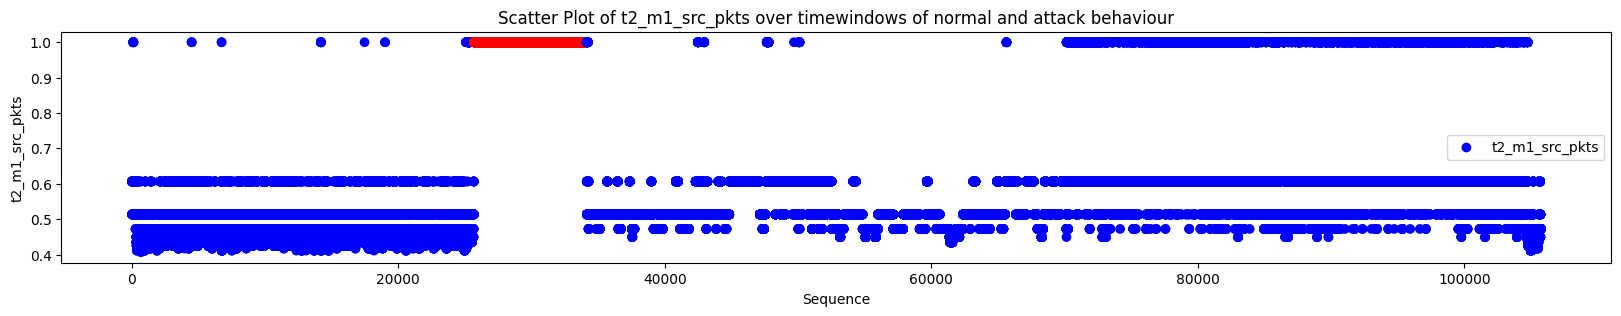

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df_topredict' is a predefined DataFrame with the necessary columns.

# List of columns to plot
# columns_to_plot = ['t1_m1_src_pkts', 't1_m1_dst_pkts', 't2_m1_src_pkts', 't2_m1_dst_pkts']
columns_to_plot = ['t2_m1_src_pkts']
# Filtering DataFrame where 'type' is either 1 or 0
df_topredict_tmp = df_topredict.query('type==1 | type==0')

# Sequence for x-axis
x_sequence = np.arange(0, len(df_topredict_tmp))

for column in columns_to_plot:
    plt.figure(figsize=(20, 3))
    plt.scatter(x_sequence, df_topredict_tmp[column], 
                c=np.where(df_topredict_tmp['type'] == 0, 'blue', 'red'), 
                label=column)
    
    plt.title(f'Scatter Plot of {column} over timewindows of normal and attack behaviour')
    plt.xlabel('Sequence')
    plt.ylabel(column)
    plt.legend()
    plt.show()


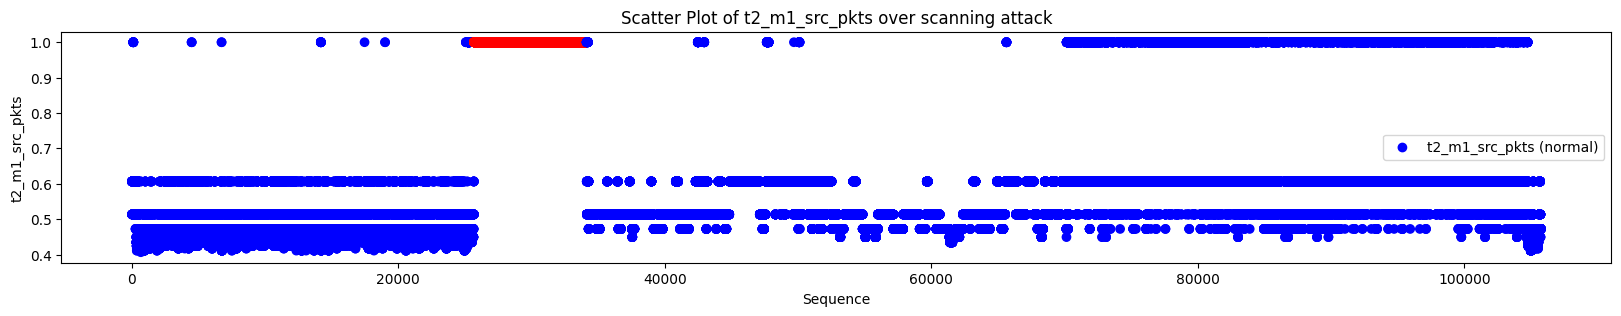

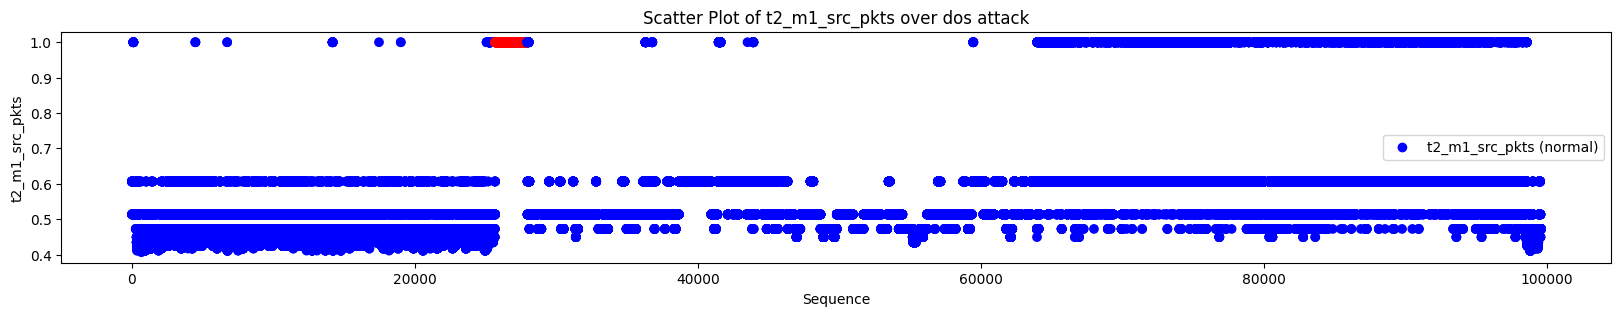

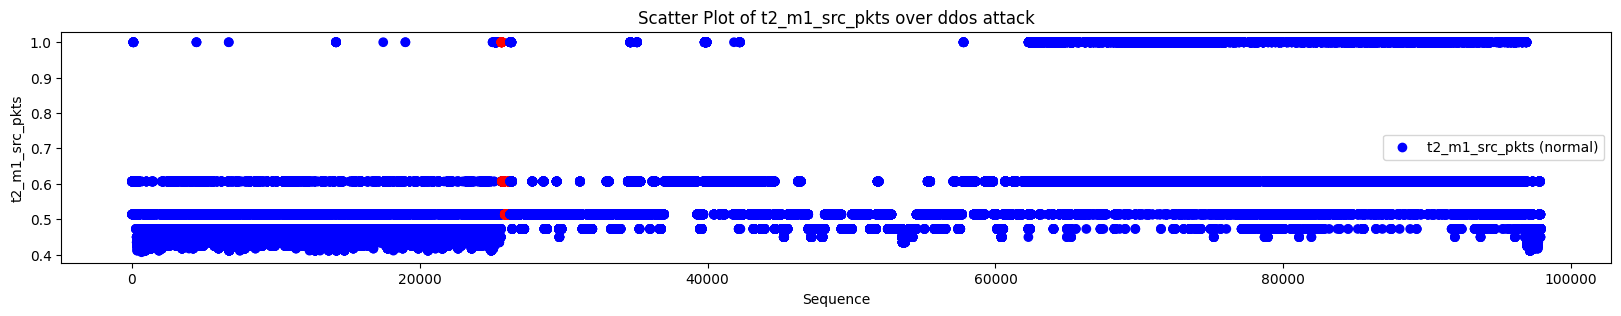

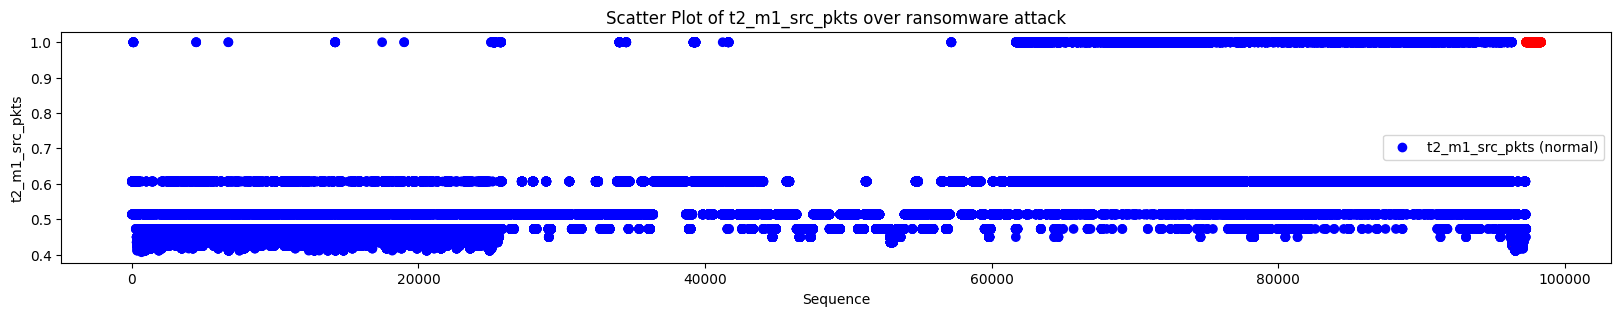

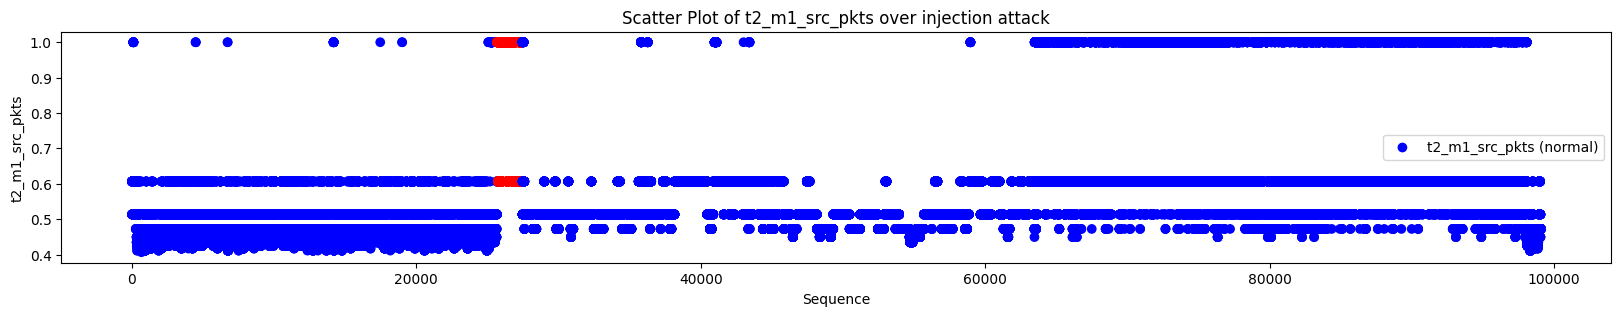

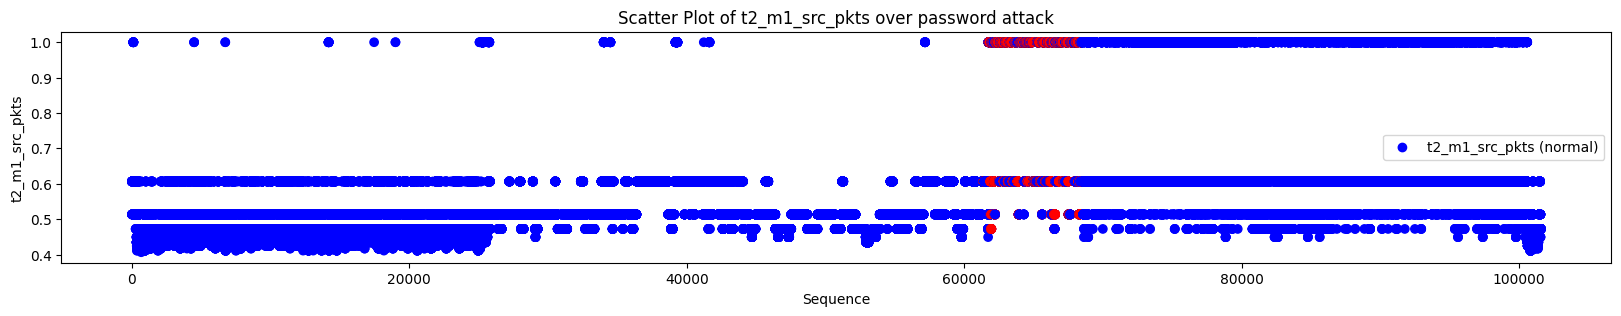

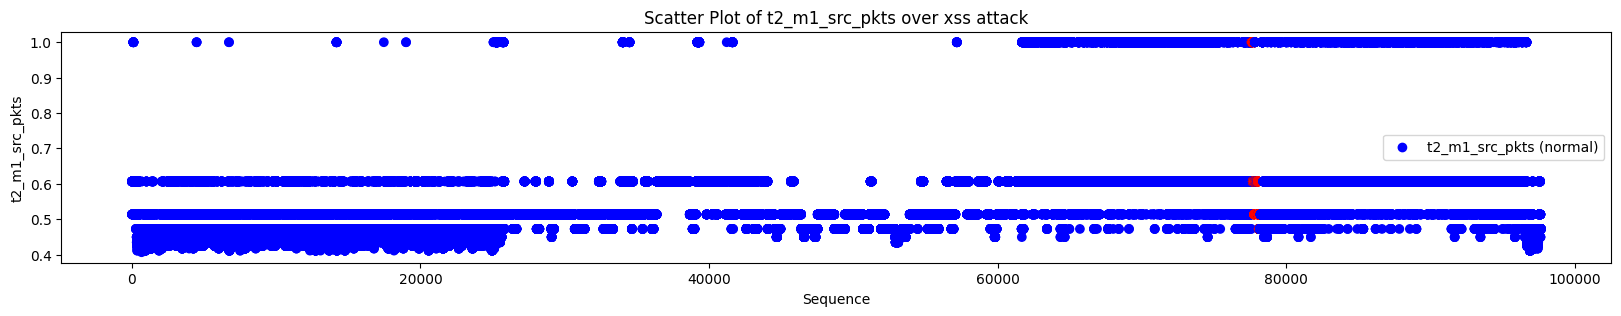

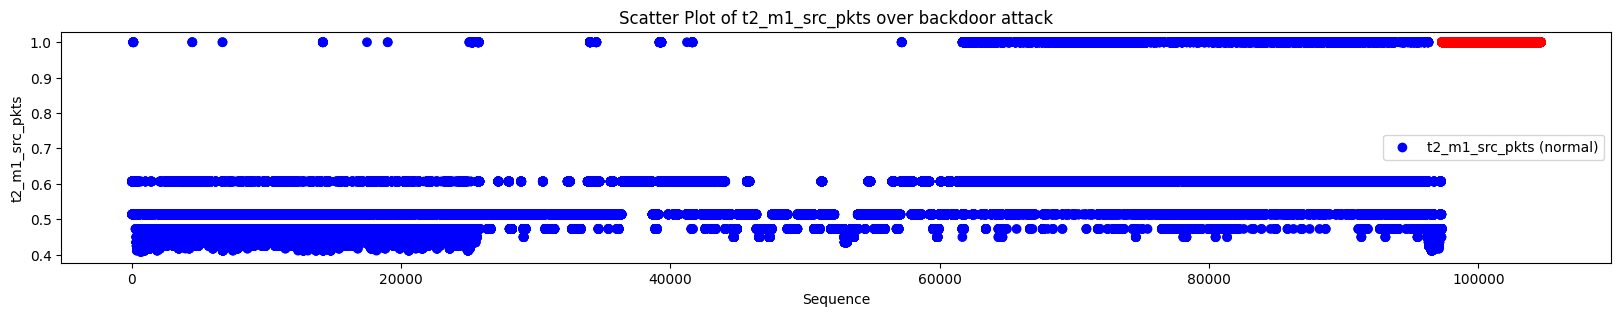

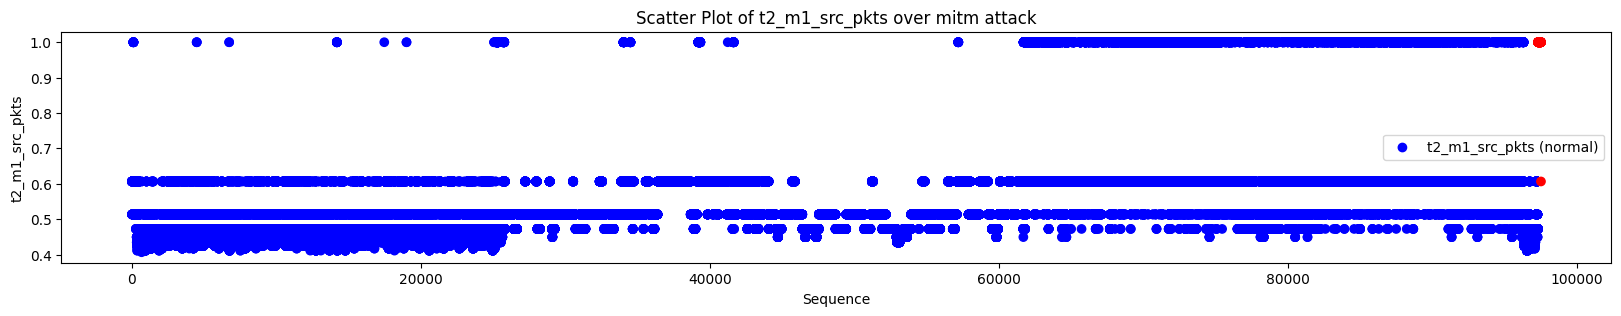

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df_topredict' is a predefined DataFrame with the necessary columns.

# Define the mapping of attack types
map_dict= { 'normal': 0, 'scanning': 1, 'dos': 2, 'ddos': 3, 'ransomware': 4, 'injection': 5, 'password': 6, 'xss': 7, 'backdoor':8, 'mitm':9}

# List of columns to plot
# columns_to_plot = ['t1_m1_src_pkts', 't1_m1_dst_pkts', 't2_m1_src_pkts', 't2_m1_dst_pkts']
columns_to_plot = ['t2_m1_src_pkts']

# Loop over each attack type in the map_dict except for 'normal'
for attack_name, attack_value in map_dict.items():
    if attack_value == 0:  # Skip the 'normal' type
        continue

    # Filter DataFrame where 'type' is either 0 or the current attack type
    df_topredict_tmp = df_topredict.query('type==0 | type==' + str(attack_value))

    # Sequence for x-axis
    x_sequence = np.arange(0, len(df_topredict_tmp))

    for column in columns_to_plot:
        plt.figure(figsize=(20, 3))
        plt.scatter(x_sequence, df_topredict_tmp[column], 
                    c=np.where(df_topredict_tmp['type'] == 0, 'blue', 'red'), 
                    label=f"{column} ({'normal' if df_topredict_tmp['type'].iloc[0] == 0 else attack_name})")

        plt.title(f'Scatter Plot of {column} over {attack_name} attack')
        plt.xlabel('Sequence')
        plt.ylabel(column)
        plt.legend()
        plt.show()


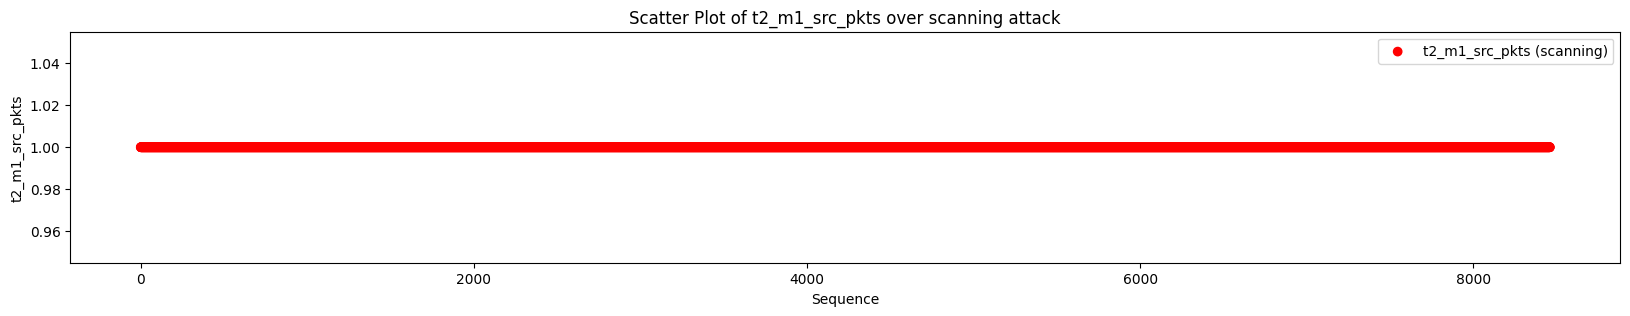

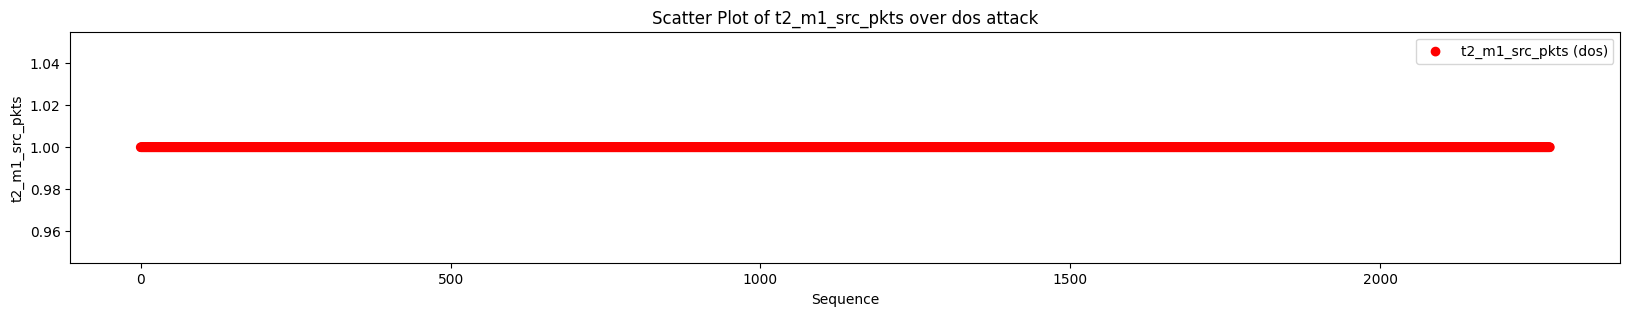

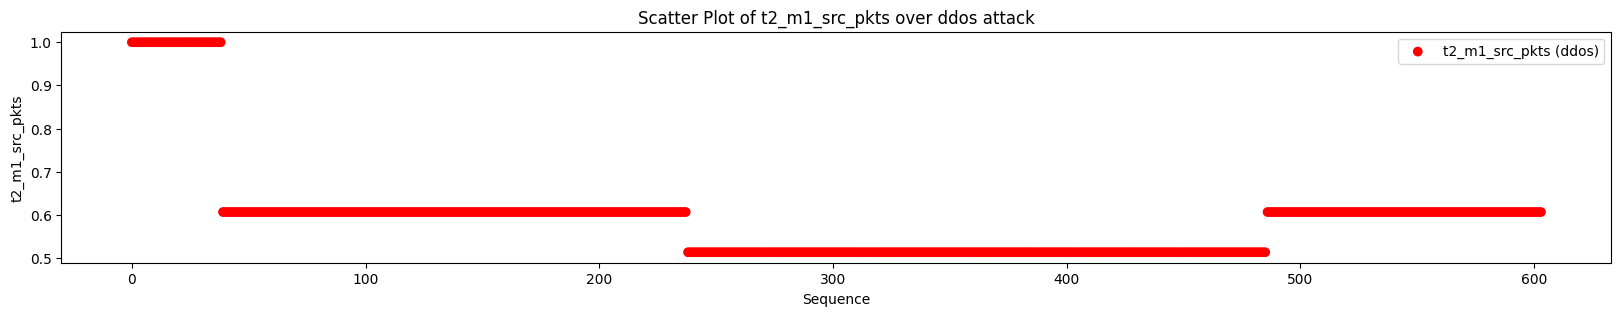

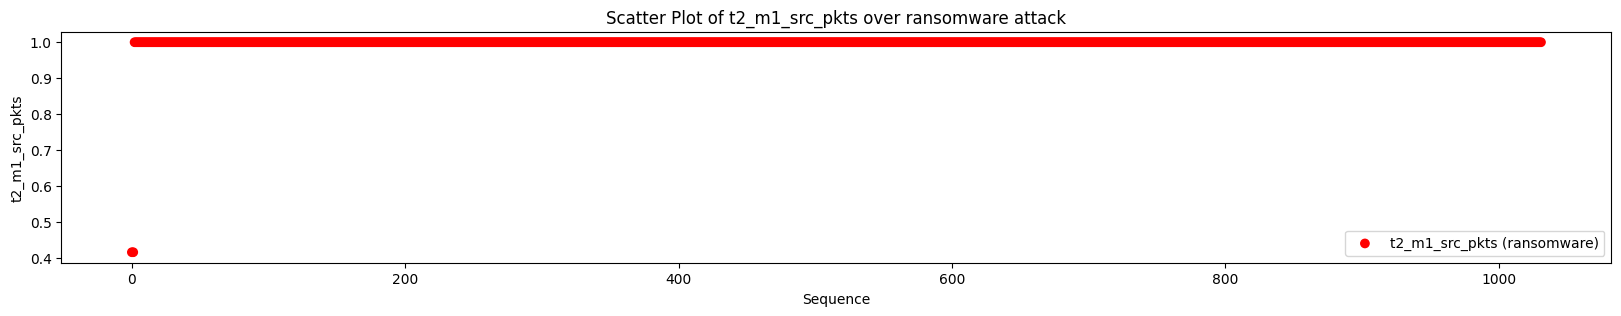

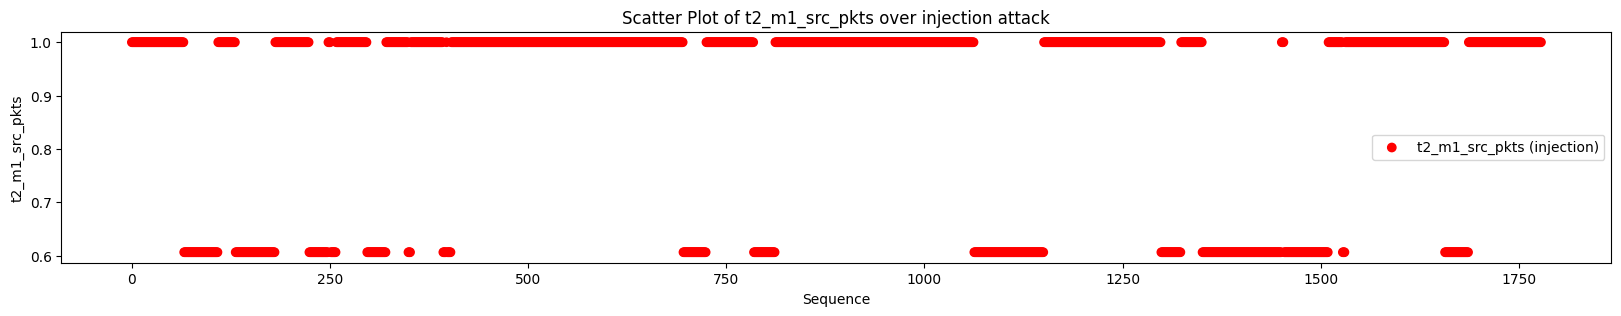

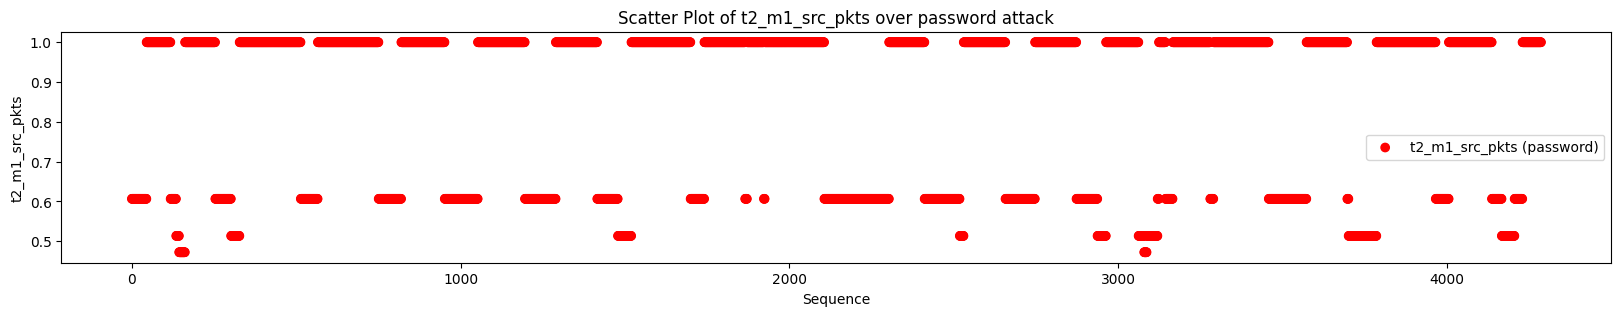

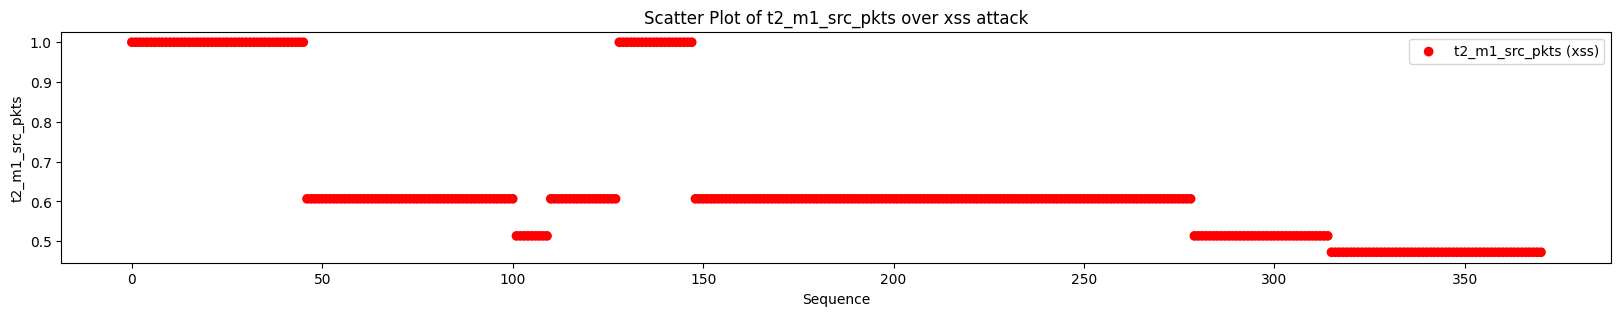

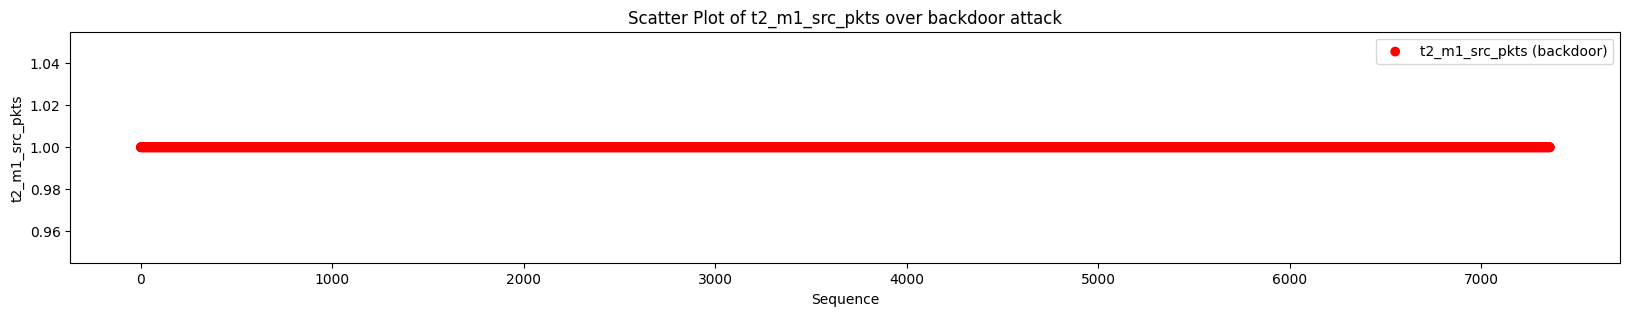

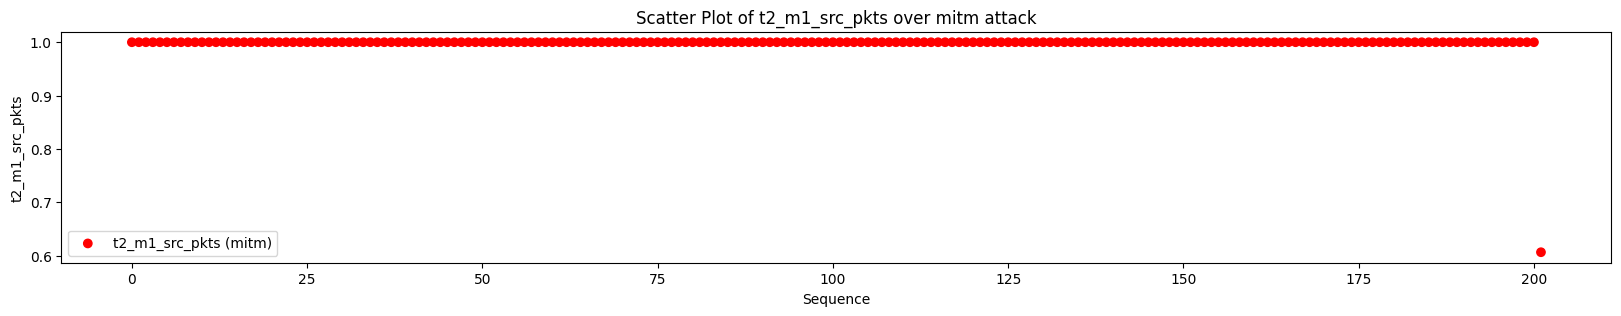

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df_topredict' is a predefined DataFrame with the necessary columns.

# Define the mapping of attack types
map_dict= { 'normal': 0, 'scanning': 1, 'dos': 2, 'ddos': 3, 'ransomware': 4, 'injection': 5, 'password': 6, 'xss': 7, 'backdoor':8, 'mitm':9}

# List of columns to plot
# columns_to_plot = ['t1_m1_src_pkts', 't1_m1_dst_pkts', 't2_m1_src_pkts', 't2_m1_dst_pkts']
columns_to_plot = ['t2_m1_src_pkts']

# Loop over each attack type in the map_dict except for 'normal'
for attack_name, attack_value in map_dict.items():
    if attack_value == 0:  # Skip the 'normal' type
        continue

    # Filter DataFrame where 'type' is either 0 or the current attack type
    df_topredict_tmp = df_topredict.query('type==' + str(attack_value))

    # Sequence for x-axis
    x_sequence = np.arange(0, len(df_topredict_tmp))

    for column in columns_to_plot:
        plt.figure(figsize=(20, 3))
        plt.scatter(x_sequence, df_topredict_tmp[column], 
                    c=np.where(df_topredict_tmp['type'] == 0, 'blue', 'red'), 
                    label=f"{column} ({'normal' if df_topredict_tmp['type'].iloc[0] == 0 else attack_name})")

        plt.title(f'Scatter Plot of {column} over {attack_name} attack')
        plt.xlabel('Sequence')
        plt.ylabel(column)
        plt.legend()
        plt.show()


In [99]:
df_topredict_without_smetric = df_topredict.copy()
df_topredict_without_smetric = df_topredict_without_smetric.drop(['t1_m1_src_pkts', 't1_m2_src_pkts', 't1_m3_src_pkts', 't1_m4_src_pkts', 't2_m1_src_pkts', 't2_m2_src_pkts', 't2_m3_src_pkts', 't2_m4_src_pkts', 't1_m1_dst_pkts', 't1_m2_dst_pkts', 't1_m3_dst_pkts', 't1_m4_dst_pkts', 't2_m1_dst_pkts', 't2_m2_dst_pkts', 't2_m3_dst_pkts', 't2_m4_dst_pkts', 'duration', 'weight'], axis=1)
print(df_topredict_without_smetric)

df_topredict_with_only_smetric = df_topredict.copy()
df_topredict_with_only_smetric = df_topredict_with_only_smetric[['t1_m1_src_pkts', 't1_m2_src_pkts', 't1_m3_src_pkts', 't1_m4_src_pkts', 't2_m1_src_pkts', 't2_m2_src_pkts', 't2_m3_src_pkts', 't2_m4_src_pkts', 't1_m1_dst_pkts', 't1_m2_dst_pkts', 't1_m3_dst_pkts', 't1_m4_dst_pkts', 't2_m1_dst_pkts', 't2_m2_dst_pkts', 't2_m3_dst_pkts', 't2_m4_dst_pkts']]
print(df_topredict_with_only_smetric)

        src_pkts  dst_pkts  type  src_bytes  dst_bytes
0            7.0       9.0     0        0.0      596.0
1            7.0       9.0     0        0.0      596.0
2            6.0      11.0     0        0.0      894.0
3            7.0       9.0     0        0.0      596.0
4            7.0       9.0     0        0.0      596.0
...          ...       ...   ...        ...        ...
123660     719.0     592.0     9    39720.0   164609.0
123661     717.0     590.0     9    39654.0   164449.0
123662     260.0     216.0     9    11416.0    41485.0
123663     260.0     216.0     9    11416.0    41485.0
123664     250.0     208.0     9    10876.0    39898.0

[123665 rows x 5 columns]
        t1_m1_src_pkts  t1_m2_src_pkts  t1_m3_src_pkts  t1_m4_src_pkts  \
0             0.606531        1.718282        5.000000               2   
1             0.606531        1.718282        4.000000               2   
2             0.606531        1.718282        4.000000               2   
3             0.6

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load your data (replace this with your actual data loading code)
X = df_topredict.drop('type', axis=1)
y = df_topredict['type']

# Convert the 'label' column to integers if it's of object type
if y.dtype == object:
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Handle non, infinite, and large values by setting them to 10^5
X[np.isnan(X) | np.isinf(X) | (X > 1e5)] = 1e5

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print(X_train)

X_train shape: (86565, 22)
y_train shape: (86565,)
X_test shape: (37100, 22)
y_test shape: (37100,)
        src_pkts  dst_pkts  src_bytes  dst_bytes   duration  weight  \
35947     5751.0     776.0     1294.0     2448.0   0.186927   731.0   
13352       55.0      42.0     7763.0    12627.0   2.864785    37.0   
48831      625.0     695.0    16791.0   100000.0   2.355584   419.0   
108518      92.0     131.0     5835.0   100000.0   0.345153    24.0   
40869      762.0     897.0     9811.0   100000.0   0.192145   448.0   
...          ...       ...        ...        ...        ...     ...   
119879     131.0     131.0        0.0        0.0   0.000477   131.0   
103694     247.0     297.0    18587.0   100000.0   0.412137    55.0   
860      25582.0    6073.0   100000.0   100000.0  40.321699    47.0   
15795       66.0      12.0     3446.0      788.0  10.836982    37.0   
121958     129.0     129.0        0.0        0.0   0.000149   129.0   

        t1_m1_src_pkts  t2_m1_src_pkts  t1_m1_d

In [101]:
# X_train_xmetrics = X_train[[]]
# X_test_xmetrics = X_test[['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate']]
# X_train = X_train.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
# X_test = X_test.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
X_train_original = X_train.copy()
X_test_original = X_test.copy()
print(X_train_original)
# X_train = X_train[['t1_m1_src_pkts', 't1_m2_src_pkts', 't1_m3_src_pkts', 't1_m4_src_pkts', 't2_m1_src_pkts', 't2_m2_src_pkts', 't2_m3_src_pkts', 't2_m4_src_pkts', 't1_m1_dst_pkts', 't1_m2_dst_pkts', 't1_m3_dst_pkts', 't1_m4_dst_pkts', 't2_m1_dst_pkts', 't2_m2_dst_pkts', 't2_m3_dst_pkts', 't2_m4_dst_pkts']]
# X_test = X_test[['t1_m1_src_pkts', 't1_m2_src_pkts', 't1_m3_src_pkts', 't1_m4_src_pkts', 't2_m1_src_pkts', 't2_m2_src_pkts', 't2_m3_src_pkts', 't2_m4_src_pkts', 't1_m1_dst_pkts', 't1_m2_dst_pkts', 't1_m3_dst_pkts', 't1_m4_dst_pkts', 't2_m1_dst_pkts', 't2_m2_dst_pkts', 't2_m3_dst_pkts', 't2_m4_dst_pkts']]

        src_pkts  dst_pkts  src_bytes  dst_bytes   duration  weight  \
35947     5751.0     776.0     1294.0     2448.0   0.186927   731.0   
13352       55.0      42.0     7763.0    12627.0   2.864785    37.0   
48831      625.0     695.0    16791.0   100000.0   2.355584   419.0   
108518      92.0     131.0     5835.0   100000.0   0.345153    24.0   
40869      762.0     897.0     9811.0   100000.0   0.192145   448.0   
...          ...       ...        ...        ...        ...     ...   
119879     131.0     131.0        0.0        0.0   0.000477   131.0   
103694     247.0     297.0    18587.0   100000.0   0.412137    55.0   
860      25582.0    6073.0   100000.0   100000.0  40.321699    47.0   
15795       66.0      12.0     3446.0      788.0  10.836982    37.0   
121958     129.0     129.0        0.0        0.0   0.000149   129.0   

        t1_m1_src_pkts  t2_m1_src_pkts  t1_m1_dst_pkts  t2_m1_dst_pkts  ...  \
35947         1.000000        1.000000        1.000000        1.0000

In [102]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        # print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_topredict.columns.tolist()[x]
    y_feature = df_topredict.columns.tolist()[y]
    z_feature = df_topredict.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_topredict[x_feature],True)
    plot_data.insert(1,y_feature,df_topredict[y_feature],True)
    plot_data.insert(2,z_feature,df_topredict[z_feature],True)
    plot_data.insert(3,attack_label,df_topredict['type'], True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

In [103]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto") # gpu_hist
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# plot_high_gain_features(clf)

In [104]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    ##"Nearest Neighbors",
    "Decision Tree",
    ##"Random Forest",
    ##"Bagging",
    ##"Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    ##"MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [##KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               ##RandomForestClassifier(max_depth=3, random_state=0),
               ##BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

In [106]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
import numpy as np

def classwise_balanced_accuracy(y_test, pred_target, num_classes):
    class_balanced_accuracy = {}
    
    for cls in range(num_classes):
        true_positive = np.sum((y_test == cls) & (pred_target == cls))
        false_positive = np.sum((y_test != cls) & (pred_target == cls))
        true_negative = np.sum((y_test != cls) & (pred_target != cls))
        false_negative = np.sum((y_test == cls) & (pred_target != cls))
        
        sensitivity = true_positive / (true_positive + false_negative)
        specificity = true_negative / (true_negative + false_positive)
        
        balanced_accuracy = (sensitivity + specificity) / 2
        class_balanced_accuracy[cls] = balanced_accuracy
    
    return class_balanced_accuracy

In [107]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time, approach_name, priority):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'TW (common features except t_features with smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 6]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'TW (common features except t_features with smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 6]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'TW (common features except t_features with smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 6]
    
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    
    # approach_name = 'TW (common features except t_features with smetrics)'
    # priority = 6
    df_scores.loc[len(df_scores.index)] = ['Scanning',
                                           1,
                                           approach_name,
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DoS',
                                           2,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           3,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Ransomware',
                                           4,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Injection',
                                           5,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['f1-score'],
                                           class_balanced_accuracies.get(5, "Class not found"),
                                           class_mcc.get(5, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Password',
                                           6,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['f1-score'],
                                           class_balanced_accuracies.get(6, "Class not found"),
                                           class_mcc.get(6, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['XSS',
                                           7,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['f1-score'],
                                           class_balanced_accuracies.get(7, "Class not found"),
                                           class_mcc.get(7, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Backdoor',
                                           8,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['f1-score'],
                                           class_balanced_accuracies.get(8, "Class not found"),
                                           class_mcc.get(8, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['MitM',
                                           9,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['f1-score'],
                                           class_balanced_accuracies.get(9, "Class not found"),
                                           class_mcc.get(9, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['recall'],
                                           priority]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [108]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [109]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time, 'TW (pkts_features with 16 smetrics)', 12)
    store_eval('numeric_only')
    
if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train[['t1_m1_src_pkts', 't2_m1_src_pkts', 't1_m1_dst_pkts', 't2_m1_dst_pkts', 'src_pkts', 'dst_pkts']],y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test[['t1_m1_src_pkts', 't2_m1_src_pkts', 't1_m1_dst_pkts', 't2_m1_dst_pkts', 'src_pkts', 'dst_pkts']])
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time, 'TW (pkts_features with Mu1 smetrics)', 6)
    store_eval('numeric_only')

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train[['t1_m2_src_pkts', 't2_m2_src_pkts', 't1_m2_dst_pkts', 't2_m2_dst_pkts', 'src_pkts', 'dst_pkts']],y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test[['t1_m2_src_pkts', 't2_m2_src_pkts', 't1_m2_dst_pkts', 't2_m2_dst_pkts', 'src_pkts', 'dst_pkts']])
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time, 'TW (pkts_features with Mu2 smetrics)', 7)
    store_eval('numeric_only')

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train[['t1_m3_src_pkts', 't2_m3_src_pkts', 't1_m3_dst_pkts', 't2_m3_dst_pkts', 'src_pkts', 'dst_pkts']],y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test[['t1_m3_src_pkts', 't2_m3_src_pkts', 't1_m3_dst_pkts', 't2_m3_dst_pkts', 'src_pkts', 'dst_pkts']])
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time, 'TW (pkts_features with Mu3 smetrics)', 8)
    store_eval('numeric_only')
    
if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train[['t1_m4_src_pkts', 't2_m4_src_pkts', 't1_m4_dst_pkts', 't2_m4_dst_pkts', 'src_pkts', 'dst_pkts']],y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test[['t1_m4_src_pkts', 't2_m4_src_pkts', 't1_m4_dst_pkts', 't2_m4_dst_pkts', 'src_pkts', 'dst_pkts']])
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time, 'TW (pkts_features with Mu4 smetrics)', 9)
    store_eval('numeric_only')
    
if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train[['t1_m1_src_pkts', 't1_m2_src_pkts', 't1_m3_src_pkts', 't1_m4_src_pkts', 't2_m1_src_pkts', 't2_m2_src_pkts', 't2_m3_src_pkts', 't2_m4_src_pkts']],y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test[['t1_m1_src_pkts', 't1_m2_src_pkts', 't1_m3_src_pkts', 't1_m4_src_pkts', 't2_m1_src_pkts', 't2_m2_src_pkts', 't2_m3_src_pkts', 't2_m4_src_pkts']])
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time, 'TW (pkts_features with 8 smetrics of src_pkts)', 10)
    store_eval('numeric_only')
    
if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train[['t1_m1_dst_pkts', 't1_m2_dst_pkts', 't1_m3_dst_pkts', 't1_m4_dst_pkts', 't2_m1_dst_pkts', 't2_m2_dst_pkts', 't2_m3_dst_pkts', 't2_m4_dst_pkts']],y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test[['t1_m1_dst_pkts', 't1_m2_dst_pkts', 't1_m3_dst_pkts', 't1_m4_dst_pkts', 't2_m1_dst_pkts', 't2_m2_dst_pkts', 't2_m3_dst_pkts', 't2_m4_dst_pkts']])
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time, 'TW (pkts_features with 8 smetrics of dst_pkts)', 11)
    store_eval('numeric_only')

Evaluating: DecisionTree
2024-02-20 00:14:52.014548
{0: 0.9993133588448275, 1: 1.0, 2: 1.0, 3: 0.997191011235955, 4: 0.9898989898989898, 5: 0.9990684788410138, 6: 0.9983504489555219, 7: 1.0, 8: 0.9995086299611304, 9: 1.0}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  DecisionTree   0.999542  0.999542  0.999761  0.998729  0.999542  0.999541   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.996813  0.998759  0.000458 0 days 00:00:01.040080   

               pred_time  
0 0 days 00:00:00.004827  
Evaluating: XGB
2024-02-20 00:14:54.241845
{0: 0.9991642978767615, 1: 1.0, 2: 1.0, 3: 1.0, 4: 0.994949494949495, 5: 0.9999589569595315, 6: 0.9966869532434848, 7: 1.0, 8: 0.999537251272559, 9: 1.0}
Index(['Classifier', 'Precision', 'Recall', 'TNR',

In [110]:
if verbose:
    show_eval()

      Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0   DecisionTree   0.999542  0.999542  0.999761  0.998729  0.999542  0.999541   
1            XGB   0.999434  0.999434  0.999658  0.998602  0.999434  0.999434   
2   DecisionTree   0.996825  0.996819  0.998119  0.991978  0.996819  0.996801   
3            XGB   0.992395  0.992318  0.995144  0.981795  0.992318  0.992259   
4   DecisionTree   0.998707  0.998706  0.998598  0.999108  0.998706  0.998705   
5            XGB   0.998600  0.998598  0.998803  0.997835  0.998598  0.998598   
6   DecisionTree   0.998204  0.998194  0.998906  0.995545  0.998194  0.998186   
7            XGB   0.997866  0.997871  0.998871  0.994148  0.997871  0.997862   
8   DecisionTree   0.999030  0.999030  0.999043  0.998981  0.999030  0.999029   
9            XGB   0.997873  0.997844  0.998051  0.997074  0.997844  0.997853   
10  DecisionTree   0.998193  0.998167  0.998189  0.998084  0.998167  0.998169   
11           XGB   0.997801 

In [111]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    print(df)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [112]:
plot_evals('/kaggle/working/eval/output_numeric_only')
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')

In [113]:
counts = df_topredict['type'].value_counts()

print(counts)

map_dict_1 = {
    'normal': 0,
    'scanning': 1,
    'dos': 2,
    'ddos': 3,
    'ransomware': 4,
    'injection': 5,
    'password': 6,
    'xss': 7,
    'backdoor':8,
    'mitm': 9
}

# Swap the keys and values in the map_dict
reverse_map_dict = {v: k for k, v in map_dict.items()}

# Map the numeric labels to their string labels
mapped_labels = {reverse_map_dict[key]: value for key, value in counts.items()}

print(mapped_labels)

type
0    97295
1     8460
8     7359
6     4288
2     2275
5     1779
4     1032
3      604
7      371
9      202
Name: count, dtype: int64
{'normal': 97295, 'scanning': 8460, 'backdoor': 7359, 'password': 4288, 'dos': 2275, 'injection': 1779, 'ransomware': 1032, 'ddos': 604, 'xss': 371, 'mitm': 202}


In [114]:
plot_confusion_matrixes("eval/output_numeric_only_report")

      Classifier                                   Confusion_Matrix  \
0   DecisionTree  [[29227     0     0     0     0     0     3   ...   
1            XGB  [[29222     0     0     0     0     1     7   ...   
2   DecisionTree  [[29192     2     0     0    11    13     4   ...   
3            XGB  [[29103     2     0     1     9     6    98   ...   
4   DecisionTree  [[29213     3     0     0     6     4     2   ...   
5            XGB  [[29213     1     0     0     0     0    16   ...   
6   DecisionTree  [[29211     5     1     0     2     3     4   ...   
7            XGB  [[29207     2     0     0     0     3    17   ...   
8   DecisionTree  [[29219     2     0     0     2     1     5   ...   
9            XGB  [[29182     1     0     0     0     1    46   ...   
10  DecisionTree  [[29219     3     0     0     0     4     3   ...   
11           XGB  [[29213     0     0     0     0     3    14   ...   
12  DecisionTree  [[29216     2     2     0     5     3     1   ...   
13    

<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 6: Timewindowing with default features and without spectral metrics
</div>


In [115]:
print(X_train_original)

        src_pkts  dst_pkts  src_bytes  dst_bytes   duration  weight  \
35947     5751.0     776.0     1294.0     2448.0   0.186927   731.0   
13352       55.0      42.0     7763.0    12627.0   2.864785    37.0   
48831      625.0     695.0    16791.0   100000.0   2.355584   419.0   
108518      92.0     131.0     5835.0   100000.0   0.345153    24.0   
40869      762.0     897.0     9811.0   100000.0   0.192145   448.0   
...          ...       ...        ...        ...        ...     ...   
119879     131.0     131.0        0.0        0.0   0.000477   131.0   
103694     247.0     297.0    18587.0   100000.0   0.412137    55.0   
860      25582.0    6073.0   100000.0   100000.0  40.321699    47.0   
15795       66.0      12.0     3446.0      788.0  10.836982    37.0   
121958     129.0     129.0        0.0        0.0   0.000149   129.0   

        t1_m1_src_pkts  t2_m1_src_pkts  t1_m1_dst_pkts  t2_m1_dst_pkts  ...  \
35947         1.000000        1.000000        1.000000        1.0000

In [116]:
X_train_xmetrics = X_train_original[['t1_m1_src_pkts', 't1_m2_src_pkts', 't1_m3_src_pkts', 't1_m4_src_pkts', 't2_m1_src_pkts', 't2_m2_src_pkts', 't2_m3_src_pkts', 't2_m4_src_pkts', 't1_m1_dst_pkts', 't1_m2_dst_pkts', 't1_m3_dst_pkts', 't1_m4_dst_pkts', 't2_m1_dst_pkts', 't2_m2_dst_pkts', 't2_m3_dst_pkts', 't2_m4_dst_pkts']]
X_test_xmetrics = X_test_original[['t1_m1_src_pkts', 't1_m2_src_pkts', 't1_m3_src_pkts', 't1_m4_src_pkts', 't2_m1_src_pkts', 't2_m2_src_pkts', 't2_m3_src_pkts', 't2_m4_src_pkts', 't1_m1_dst_pkts', 't1_m2_dst_pkts', 't1_m3_dst_pkts', 't1_m4_dst_pkts', 't2_m1_dst_pkts', 't2_m2_dst_pkts', 't2_m3_dst_pkts', 't2_m4_dst_pkts']]
# X_train = X_train.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
# X_test = X_test.drop(['t1_m1_pkts', 't1_m2_pkts', 't1_m3_pkts', 't1_m4_pkts', 't2_m1_pkts', 't2_m2_pkts', 't2_m3_pkts', 't2_m4_pkts', 't1_m1_bytes', 't1_m2_bytes', 't1_m3_bytes', 't1_m4_bytes', 't2_m1_bytes', 't2_m2_bytes', 't2_m3_bytes', 't2_m4_bytes', 't1_m1_rate', 't1_m2_rate', 't1_m3_rate', 't1_m4_rate', 't2_m1_rate', 't2_m2_rate', 't2_m3_rate', 't2_m4_rate'], axis=1)
X_train = X_train_original[['src_pkts', 'dst_pkts']]
X_test = X_test_original[['src_pkts', 'dst_pkts']]


In [117]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        # print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    x_feature = df_topredict_without_smetric.columns.tolist()[x]
    y_feature = df_topredict_without_smetric.columns.tolist()[y]
    z_feature = df_topredict_without_smetric.columns.tolist()[z]

    plot_data= pd.DataFrame()
    plot_data.insert(0,x_feature,df_topredict_without_smetric[x_feature],True)
    plot_data.insert(1,y_feature,df_topredict_without_smetric[y_feature],True)
    plot_data.insert(2,z_feature,df_topredict_without_smetric[z_feature],True)
    plot_data.insert(3,attack_label,df_topredict_without_smetric['type'], True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

In [118]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto") # gpu_hist
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# plot_high_gain_features(clf)

In [119]:
y_pred_commonfeatures = y_pred

In [120]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(report.get('2')['f1-score'])
print(report)
# Extract and print F1-score for each class
for label, metrics in report.items():
    if label.isdigit():  # Check if the key is a digit (class label)
        print(f"F1-score for class {label} 'f1-score': {metrics['f1-score']}")


0.9957203994293866
{'0': {'precision': 0.9913153485827606, 'recall': 0.9918918918918919, 'f1-score': 0.9916035364331276, 'support': 29230}, '1': {'precision': 0.9877582249426167, 'recall': 1.0, 'f1-score': 0.993841416474211, 'support': 2582}, '2': {'precision': 0.9985693848354793, 'recall': 0.9928876244665719, 'f1-score': 0.9957203994293866, 'support': 703}, '3': {'precision': 0.9943820224719101, 'recall': 0.9943820224719101, 'f1-score': 0.9943820224719101, 'support': 178}, '4': {'precision': 0.9438596491228071, 'recall': 0.9057239057239057, 'f1-score': 0.9243986254295532, 'support': 297}, '5': {'precision': 0.9672131147540983, 'recall': 0.7468354430379747, 'f1-score': 0.8428571428571427, 'support': 553}, '6': {'precision': 0.8786084381939304, 'recall': 0.9541800643086816, 'f1-score': 0.9148362235067437, 'support': 1244}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 98}, '8': {'precision': 0.9916897506925207, 'recall': 0.993984266543267, 'f1-score': 0.992835682921

In [121]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    ##"Nearest Neighbors",
    "Decision Tree",
    ##"Random Forest",
    ##"Bagging",
    ##"Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    ##"MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [##KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               ##RandomForestClassifier(max_depth=3, random_state=0),
               ##BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

In [123]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'TW (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 4]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'TW (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 4]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'TW (common features except t_features)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 4]
   
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    
    approach_name = 'TW (pkts_features)'
    priority = 4
    df_scores.loc[len(df_scores.index)] = ['Scanning',
                                           1,
                                           approach_name,
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DoS',
                                           2,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           3,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Ransomware',
                                           4,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Injection',
                                           5,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['f1-score'],
                                           class_balanced_accuracies.get(5, "Class not found"),
                                           class_mcc.get(5, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Password',
                                           6,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['f1-score'],
                                           class_balanced_accuracies.get(6, "Class not found"),
                                           class_mcc.get(6, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['XSS',
                                           7,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['f1-score'],
                                           class_balanced_accuracies.get(7, "Class not found"),
                                           class_mcc.get(7, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Backdoor',
                                           8,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['f1-score'],
                                           class_balanced_accuracies.get(8, "Class not found"),
                                           class_mcc.get(8, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['MitM',
                                           9,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['f1-score'],
                                           class_balanced_accuracies.get(9, "Class not found"),
                                           class_mcc.get(9, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['recall'],
                                           priority]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [124]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [125]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')

Evaluating: DecisionTree
2024-02-20 00:18:05.184984
{0: 0.9915672311044901, 1: 0.9992162622503133, 2: 0.9999862626040608, 3: 0.9915594916462217, 4: 0.9660174918034332, 5: 0.9274073301831213, 6: 0.9995144027341951, 7: 0.9999864872169072, 8: 0.9972116008519323, 9: 0.9536227233009612}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  DecisionTree   0.994562  0.994609  0.996991  0.985749  0.994609  0.994538   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.966886  0.985377  0.005391 0 days 00:00:00.204923   

               pred_time  
0 0 days 00:00:00.005279  
Evaluating: XGB
2024-02-20 00:18:06.588701
{0: 0.9798087159586524, 1: 0.9995364737238542, 2: 0.9964300748373467, 3: 0.9971774691743116, 4: 0.9526445792782776, 5: 0.8732261873301346, 6: 0

In [126]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  DecisionTree   0.994562  0.994609  0.996991  0.985749  0.994609  0.994538   
1           XGB   0.986717  0.986496  0.991553  0.967684  0.986496  0.986284   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.966886  0.985377  0.005391 0 days 00:00:00.204923   
1           0.920951  0.963408  0.013504 0 days 00:00:17.143504   

               pred_time  
0 0 days 00:00:00.005279  
1 0 days 00:00:00.208852  


In [127]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    print(df)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [128]:
plot_evals('/kaggle/working/eval/output_numeric_only')
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')
plot_confusion_matrixes("eval/output_numeric_only_report")

     Classifier                                   Confusion_Matrix  \
0  DecisionTree  [[29153    14     1     1    23    14     5   ...   
1           XGB  [[28993    27     1     1    16    11   162   ...   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  


<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana; color:white;background-color:green;">
    <a id="time-windowing-default"></a>
    📌 Approach 7: Timewindowing with only spectral metrics
</div>


In [129]:
X_train = X_train_xmetrics
print(X_train.shape)
X_test = X_test_xmetrics
print(X_test.shape)

(86565, 16)
(37100, 16)


In [130]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

   
def plot_features(plot_data, x_feature ,y_feature, z_feature, target_label, normal_cat):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection="3d")


    ax.set_xlabel(x_feature, size=16)
    ax.set_ylabel(y_feature, size=16)
    ax.set_zlabel(z_feature, size=16)

    ax.set_title("attack classes")

    c=['b','g','c','m','y','k','r']
    c_index=0

    for target in plot_data[target_label].unique():

        current=plot_data.loc[plot_data[target_label]==target]
        x_data=current[x_feature]
        y_data=current[y_feature]
        z_data=current[z_feature]

        if target == normal_cat:
            color='b'
        else:
            color=c[c_index%len(c)]

        # print(target+":"+color)
        ax.scatter(x_data, y_data, z_data, c=color)
        c_index=c_index+1

    plt.show()
    
    
def plot_high_gain_features(clf):
    
    x, y, z = clf.feature_importances_.argsort()[-3:][::-1]
    print(x, y, z)
    x_feature = df_topredict_with_only_smetric.columns.tolist()[x]
    y_feature = df_topredict_with_only_smetric.columns.tolist()[y]
    z_feature = df_topredict_with_only_smetric.columns.tolist()[z]

    plot_data= pd.DataFrame()
    print(df_topredict_with_only_smetric)
    print(df_topredict_with_only_smetric[x_feature])
    plot_data.insert(0,x_feature,df_topredict_with_only_smetric[x_feature],True)
    plot_data.insert(1,y_feature,df_topredict_with_only_smetric[y_feature],True)
    plot_data.insert(2,z_feature,df_topredict_with_only_smetric[z_feature],True)
    plot_data.insert(3,attack_label,df_topredict_without_smetric['type'], True) # add target 
    
    plot_features(plot_data, x_feature ,y_feature, z_feature, attack_label, 'Normal')

4 7 5
        t1_m1_src_pkts  t1_m2_src_pkts  t1_m3_src_pkts  t1_m4_src_pkts  \
0             0.606531        1.718282        5.000000               2   
1             0.606531        1.718282        4.000000               2   
2             0.606531        1.718282        4.000000               2   
3             0.606531        0.000000        4.000000               3   
4             0.606531        0.000000        4.000000               3   
...                ...             ...             ...             ...   
123660        1.000000   162753.791419      431.201884               7   
123661        1.000000   162753.791419      429.274233               7   
123662        1.000000        3.561330      310.030971               6   
123663        1.000000        3.561330      310.030971               6   
123664        0.606531       12.387373      201.195801               7   

        t2_m1_src_pkts  t2_m2_src_pkts  t2_m3_src_pkts  t2_m4_src_pkts  \
0             0.606531        0

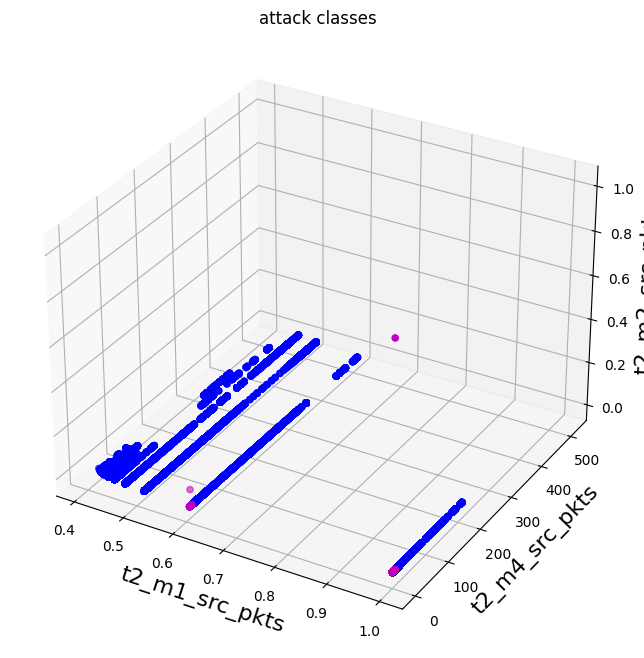

In [131]:
from xgboost import XGBClassifier

clf = XGBClassifier(tree_method="auto") # gpu_hist
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

plot_high_gain_features(clf)

In [132]:
import plotly.express as px

def plot_importance(clf, metric = 'all'):
    
    importance = pd.DataFrame()
    importance['Features'] = clf.feature_names_in_
    
    if metric == 'all' or metric == 'gain':
    
        importance['Gain'] = clf.feature_importances_
        importance = importance.sort_values(by=['Gain'],ascending=False)
        fig = px.bar(importance,x='Gain', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'weight':
        weights = clf.get_booster().get_score(importance_type='weight')
        w = []
        for elm in importance['Features']:
            try:
                w.append(weights[elm])
            except:
                w.append(0)
        importance['Weight'] = w
        importance = importance.sort_values(by=['Weight'],ascending=False)
        fig = px.bar(importance,x='Weight', y='Features',color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
    if metric == 'all' or metric == 'cover':
        coverages = clf.get_booster().get_score(importance_type='cover')
        c = []
        for elm in importance['Features']:
            try:
                c.append(coverages[elm])
            except:
                c.append(0)
        importance['Coverage'] = c
        importance = importance.sort_values(by=['Coverage'],ascending=False)
        fig = px.bar(importance,x='Coverage', y='Features', color ='Features',orientation ='h')
        fig.update_yaxes(categoryorder="total ascending")

        fig.show()
    
plot_importance(clf, metric = 'all')

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

clf_names = [
    ##"Nearest Neighbors",
    "Decision Tree",
    ##"Random Forest",
    ##"Bagging",
    ##"Extra Trees",
    #"Gradient Boosting",
    "XGBoost",
    ##"MLP"#,
    #"Linear SVM",
    #"RBF SVM",
    #"Histogram-based Gradient Boosting"
]

classifiers = [##KNeighborsClassifier(3),
               DecisionTreeClassifier(),
               ##RandomForestClassifier(max_depth=3, random_state=0),
               ##BaggingClassifier(n_estimators=10, random_state=0),
               # ExtraTreesClassifier(n_estimators=100, random_state=0),
               # GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
               XGBClassifier(tree_method="auto"),
               # MLPClassifier(alpha=1, max_iter=1000)#,
               #SVC(kernel="linear", C=0.025),
               #SVC(gamma=2, C=1),
               #HistGradientBoostingClassifier()
              ]

In [134]:
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, matthews_corrcoef, zero_one_loss
from sklearn.metrics import classification_report, confusion_matrix

eval_df=DataFrame(columns=['Classifier',
                           'Precision',
                           'Recall',
                           'TNR',
                           'TPR',
                           'Accuracy',
                           'F1_score',
                           'Balanced_accuracy',
                           'MCC',
                           #'AUROC',
                           #'AUPRC',
                           'Error',
                           'fit_time',
                           'pred_time'])
                           #'Cross_validation_mean'])
cm_df=DataFrame(columns=['Classifier','Confusion_Matrix', 'Classification Report'])

def get_tnr_tpr(y_test, pred_target):
    
    tn=0
    tp=0
    fn=0
    fp=0

    i=0
    y_test_list=list(y_test)
    
    for i in range(len(y_test)):
        if(pred_target[i] == 0):
            if(y_test_list[i] == pred_target[i]):
                tn += 1
            else:
                fn += 1
        else:
            if(y_test_list[i] == pred_target[i]):
                tp += 1
            else:
                fp += 1

    tnr = tn/(tn+fp)
    tpr = tp/(tp+fn)

    return tnr,tpr

def get_auroc(classifier):
    
    y_proba=classifier.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_proba[:, 1])
    return auc(fpr, tpr)

def eval_clf(classifier,y_test,pred_target, fit_time, pred_time):
    
    tnr, tpr = get_tnr_tpr(y_test, pred_target) 

    eval_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                       precision_score(y_test, pred_target, average='weighted'),
                                       recall_score(y_test, pred_target, average='weighted'),
                                       tnr,
                                       tpr,
                                       accuracy_score(y_test, pred_target),
                                       f1_score(y_test, pred_target, average='weighted'),
                                       balanced_accuracy_score(y_test, pred_target),
                                       matthews_corrcoef(y_test, pred_target),
                                       #get_auroc(classifier),
                                       #average_precision_score(y_test, pred_target),]
                                       zero_one_loss(y_test, pred_target),
                                       fit_time,
                                       pred_time]
                                       #,
                                       #cross_val_score(classifier, X, y, cv=5).mean()]
    cm_df.loc[len(eval_df.index)] = [type(classifier).__name__.replace('Classifier',''),
                                     confusion_matrix(y_test, pred_target),
                                     classification_report(y_test, pred_target)]
    # df_scores.loc[len(df_scores.index)] = ['DDoS', 2, 'TW (smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'], 5]
    # df_scores.loc[len(df_scores.index)] = ['ScanService', 4, 'TW (smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'], 5]
    # df_scores.loc[len(df_scores.index)] = ['OS Fingerprint', 1, 'TW (smetrics)', type(classifier).__name__, classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'], 5]
   
    num_classes = len(np.unique(y_test))  # Assuming labels start from 0 and are continuous
    class_balanced_accuracies = classwise_balanced_accuracy(y_test, pred_target, num_classes)
    class_mcc = classwise_mcc(y_test, pred_target, num_classes)
    print(class_balanced_accuracies)
    
    approach_name = 'TW (smetrics)'
    priority = 5
    df_scores.loc[len(df_scores.index)] = ['Scanning',
                                           1,
                                           approach_name,
                                           type(classifier).__name__, 
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['f1-score'],
                                           class_balanced_accuracies.get(1, "Class not found"),
                                           class_mcc.get(1, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('1')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DoS',
                                           2,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['f1-score'],
                                           class_balanced_accuracies.get(2, "Class not found"),
                                           class_mcc.get(2, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('2')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['DDoS',
                                           3,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['f1-score'],
                                           class_balanced_accuracies.get(3, "Class not found"),
                                           class_mcc.get(3, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('3')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Ransomware',
                                           4,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['f1-score'],
                                           class_balanced_accuracies.get(4, "Class not found"),
                                           class_mcc.get(4, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('4')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Injection',
                                           5,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['f1-score'],
                                           class_balanced_accuracies.get(5, "Class not found"),
                                           class_mcc.get(5, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('5')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Password',
                                           6,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['f1-score'],
                                           class_balanced_accuracies.get(6, "Class not found"),
                                           class_mcc.get(6, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('6')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['XSS',
                                           7,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['f1-score'],
                                           class_balanced_accuracies.get(7, "Class not found"),
                                           class_mcc.get(7, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('7')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['Backdoor',
                                           8,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['f1-score'],
                                           class_balanced_accuracies.get(8, "Class not found"),
                                           class_mcc.get(8, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('8')['recall'],
                                           priority]
    df_scores.loc[len(df_scores.index)] = ['MitM',
                                           9,
                                           approach_name,
                                           type(classifier).__name__,
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['f1-score'],
                                           class_balanced_accuracies.get(9, "Class not found"),
                                           class_mcc.get(9, "Class not found"),
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['precision'],
                                           classification_report(y_test, pred_target, output_dict=True).get('9')['recall'],
                                           priority]
    
    if verbose:
        print(eval_df.columns)
        print(eval_df.loc[eval_df.Classifier==type(classifier).__name__.replace('Classifier','')])
        
def show_eval():
    print(eval_df)
    if very_verbose:
        for entry in cm_df.iterrows():
            print("Learning report for "+str(entry[0])+":")
            print(entry[1])
            #print(entry[2])

In [135]:
def store_eval(eval_type):
    os.chdir('/kaggle/working/')
    os.makedirs('eval/', exist_ok=True)
    eval_df.to_csv('eval/output_'+eval_type, index=False)
    cm_df.to_csv('eval/output_'+eval_type+'_report', index=False)

In [136]:
from datetime import datetime

if eval_ML:
    for clf in classifiers:
        print('Evaluating: ' + type(clf).__name__.replace('Classifier',''))
        print(datetime.now())
        start_time =   datetime.now()
        clf=clf.fit(X_train,y_train)
        fit_time =  datetime.now() - start_time
        print(X_test.shape)
        y_pred = clf.predict(X_test)
        pred_time =  datetime.now() - start_time - fit_time
        print(y_test.shape, y_pred.shape)
        eval_clf(clf,y_test,y_pred, fit_time, pred_time)
    store_eval('numeric_only')
    


Evaluating: DecisionTree
2024-02-20 00:18:55.169374
(37100, 16)
(37100,) (37100,)
{0: 0.9987537824927045, 1: 0.9999855148038704, 2: 1.0, 3: 0.997191011235955, 4: 0.9848077273015458, 5: 0.9917804817309981, 6: 0.9987523782159722, 7: 0.9999864872169072, 8: 0.9985831325062485, 9: 1.0}
Index(['Classifier', 'Precision', 'Recall', 'TNR', 'TPR', 'Accuracy',
       'F1_score', 'Balanced_accuracy', 'MCC', 'Error', 'fit_time',
       'pred_time'],
      dtype='object')
     Classifier  Precision    Recall       TNR      TPR  Accuracy  F1_score  \
0  DecisionTree   0.999081  0.999084  0.999453  0.99771  0.999084  0.999081   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.994241  0.997517  0.000916 0 days 00:00:00.735959   

               pred_time  
0 0 days 00:00:00.004841  
Evaluating: XGB
2024-02-20 00:18:57.136090
(37100, 16)
(37100,) (37100,)
{0: 0.9994819598843854, 1: 1.0, 2: 1.0, 3: 0.997191011235955, 4: 0.9932524074170135, 5: 0.9990547978275244, 6: 0.999

In [137]:
if verbose:
    show_eval()

     Classifier  Precision    Recall       TNR       TPR  Accuracy  F1_score  \
0  DecisionTree   0.999081  0.999084  0.999453  0.997710  0.999084  0.999081   
1           XGB   0.999542  0.999542  0.999624  0.999237  0.999542  0.999542   

   Balanced_accuracy       MCC     Error               fit_time  \
0           0.994241  0.997517  0.000916 0 days 00:00:00.735959   
1           0.997676  0.998759  0.000458 0 days 00:00:25.113008   

               pred_time  
0 0 days 00:00:00.004841  
1 0 days 00:00:00.122123  


In [138]:
import plotly.express as px
import re

def plot_evals(results_path, metrics = ["TNR", "TPR", "Precision", "Recall", "F1_score", "Accuracy", "Balanced_accuracy", "MCC"]):
    eval_df = pd.read_csv(results_path)
    # ordering columns
    col_order = ["Classifier"] + metrics
    eval_df = eval_df[col_order]
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df, id_vars=['Classifier'], var_name='Metric', value_name='Value')

    # selecting only the desired metrics
    melted_df = melted_df[melted_df['Metric'].isin(metrics)]

    # Create the bar chart
    fig = px.bar(melted_df, x='Classifier', y='Value', color='Metric', barmode='group', hover_data={"Metric":True,
                                                                                                    "Classifier":False,
                                                                                                    "Value":True})
    
    # Update the layout
    fig.update_layout(title='Evaluation Metrics by Classifier',
                    xaxis_title='Classifier',
                    yaxis_title='Value',
                    hovermode='x unified',
                )

    # Show the chart
    fig.show()
    
    
def plot_fit_pred_time(results_path):
    eval_df = pd.read_csv(results_path)
    
    # Melt the dataframe to convert the metrics into a single column
    melted_df = pd.melt(eval_df[["Classifier", "fit_time", "pred_time"]], id_vars=['Classifier'], var_name='Time', value_name='Value')
    melted_df["Value"] = pd.to_timedelta(melted_df["Value"])
    melted_df['Value'] = melted_df['Value'].dt.total_seconds()
    fig = px.bar(melted_df, x="Classifier", y="Value", color='Time', barmode='group', hover_data={"Time":True,
                                                                                                "Classifier":False,
                                                                                                "Value":True})
    # Update the layout
    fig.update_layout(title='Training and prediction time by Classifier',
                     xaxis_title='Classifier',
                     yaxis_title='Time in seconds',
                     hovermode='x unified')
    fig.update_traces(hovertemplate='%{y:.2f}s')
    
    fig.show()
    

def plot_confusion_matrixes(results_report_path):
    df = pd.read_csv(results_report_path)
    print(df)
    for row in df.itertuples():
        matrix = row.Confusion_Matrix
        
        # erasing the starting spaces at the beginning of a bracket
        matrix = re.sub(r"\[\s+", "[", matrix)

        # replace the spaces between closing and opening bracket by a comma
        matrix = re.sub(r"]\s+\[", "],[", matrix)  
        
        # replace all series of spaces by a comma
        matrix = re.sub(r"\s+", ",", matrix)

        # convert the string to a numpy array
        confusion_matrix = np.array(eval(matrix))

        # in case of imbalanced data, search for the nth highest value in the confusion matrix to be the highest scale
        n=2
        nth_max = confusion_matrix.flatten()
        nth_max.sort()
        nth_max = nth_max[-n]
        fig = px.imshow(confusion_matrix, height=800,
                width=800,
                text_auto=True,
                title=f"{row.Classifier}: Confusion matrix",
                color_continuous_scale='Blues',
                range_color=[0, nth_max]) # to use with Y = attack_cat
        fig.update_layout(xaxis_title="Predicted label",
                    yaxis_title="True label")

        fig.show()

In [139]:
plot_evals('/kaggle/working/eval/output_numeric_only')
plot_fit_pred_time('/kaggle/working/eval/output_numeric_only')
plot_confusion_matrixes("eval/output_numeric_only_report")

     Classifier                                   Confusion_Matrix  \
0  DecisionTree  [[29224     1     0     0     0     1     3   ...   
1           XGB  [[29222     0     0     0     1     1     6   ...   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  


In [140]:
df_scores = df_scores.sort_values(by='order')
print(df_scores)

   attack_type  attack_label                        approach_name  \
0     Scanning             1              OD (numerical features)   
17        MitM             9              OD (numerical features)   
16    Backdoor             8              OD (numerical features)   
15         XSS             7              OD (numerical features)   
14    Password             6              OD (numerical features)   
..         ...           ...                                  ...   
68    Password             6  TW (pkts_features with 16 smetrics)   
70    Backdoor             8  TW (pkts_features with 16 smetrics)   
71        MitM             9  TW (pkts_features with 16 smetrics)   
62        MitM             9  TW (pkts_features with 16 smetrics)   
69         XSS             7  TW (pkts_features with 16 smetrics)   

                classifier  f1_score  balanced_accuracy       MCC  Precision  \
0   DecisionTreeClassifier  1.000000           1.000000  1.000000   1.000000   
17         

In [141]:
testing_df = X_test.copy()
testing_df['tw_actual_lbl'] = y_test
testing_df['tw_xmetrics_pred_lbl'] = y_pred
testing_df['tw_commonfeatures_pred_lbl'] = y_pred_commonfeatures
print(testing_df)

        t1_m1_src_pkts  t1_m2_src_pkts  t1_m3_src_pkts  t1_m4_src_pkts  \
6843          0.449329    3.950286e+01        8.880589               9   
52411         1.000000    1.221245e-14      427.083667             107   
100340        0.606531    1.718282e+00      216.156744              17   
117732        1.000000    1.000000e+05      123.327957               0   
25882         1.000000    4.443171e+03      380.567267              12   
...                ...             ...             ...             ...   
73344         0.606531   -1.110223e-16      272.630040              67   
6481          0.606531    3.764835e+00       16.629136               4   
80756         0.513417    1.014055e+00      868.540903              18   
68414         0.472367    1.718282e+00       36.750000              94   
1197          0.513417    7.350386e+02       10.065384               4   

        t2_m1_src_pkts  t2_m2_src_pkts  t2_m3_src_pkts  t2_m4_src_pkts  \
6843          0.416862    0.000000e+0

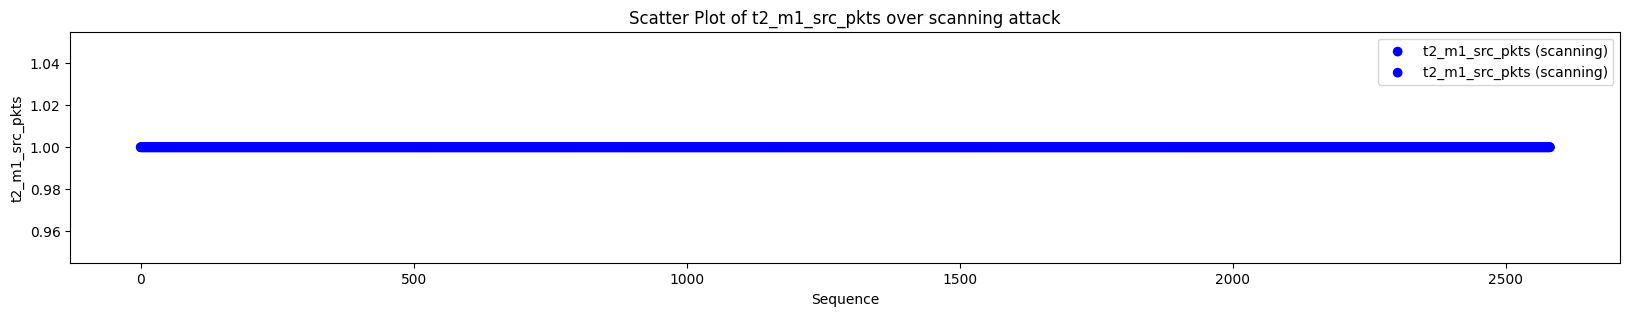

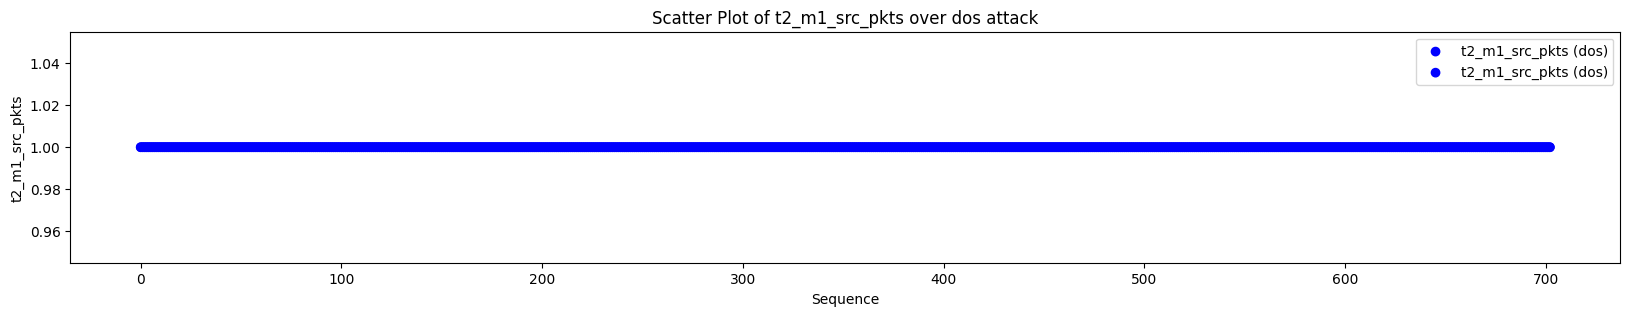

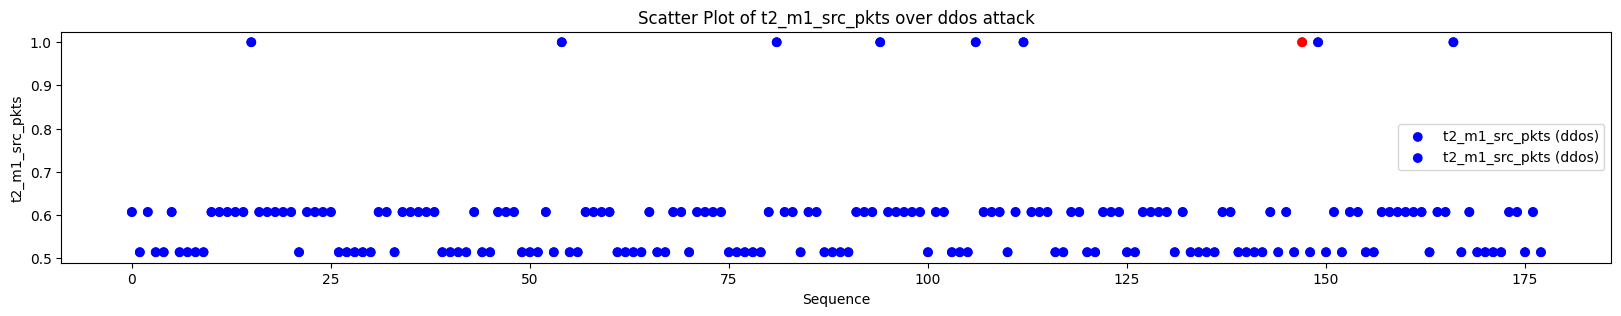

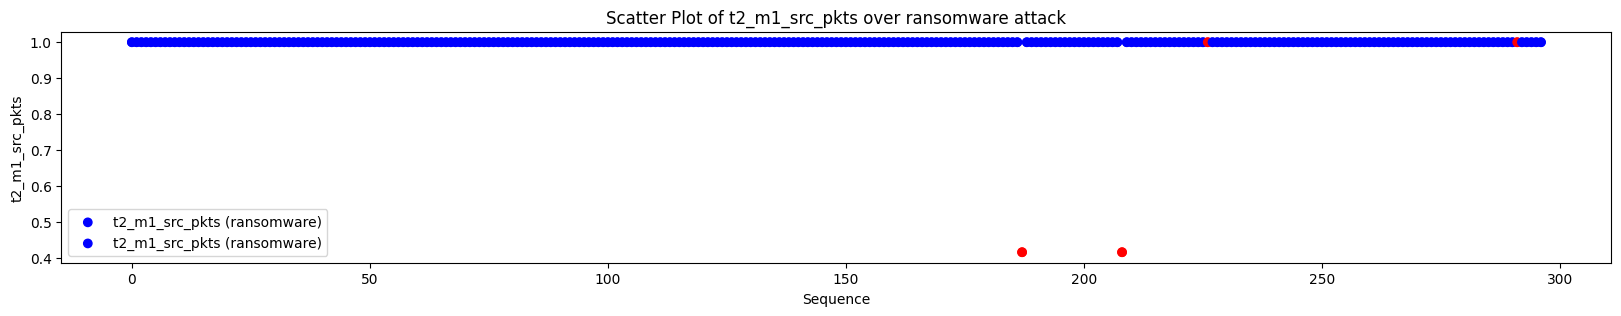

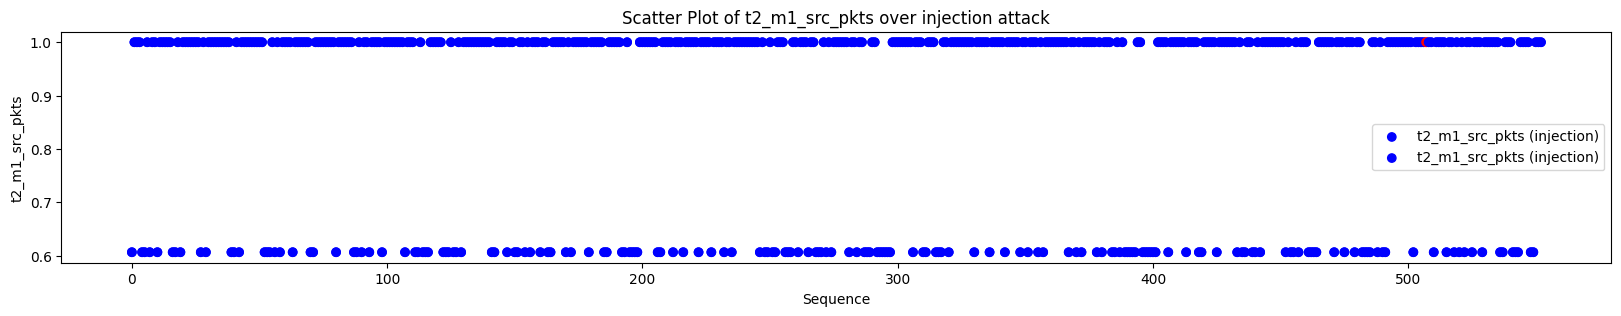

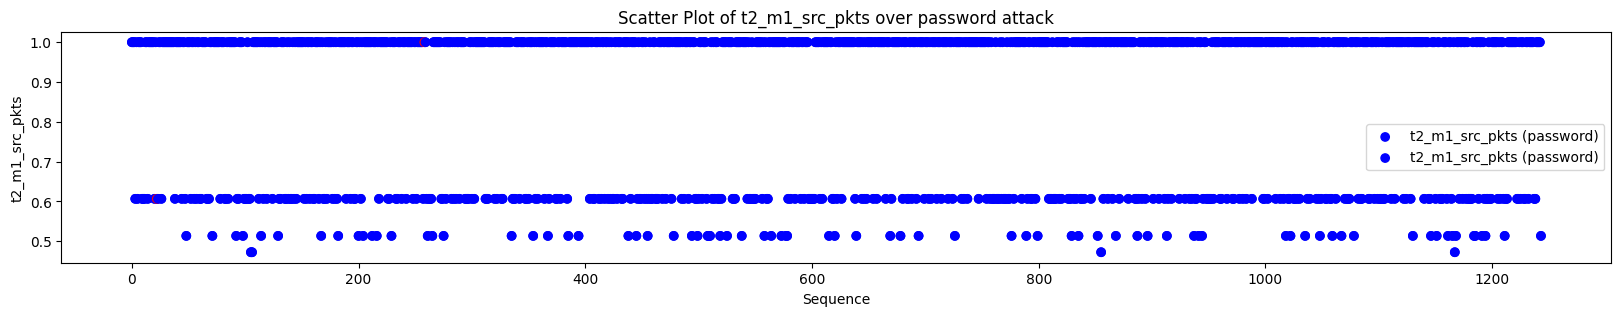

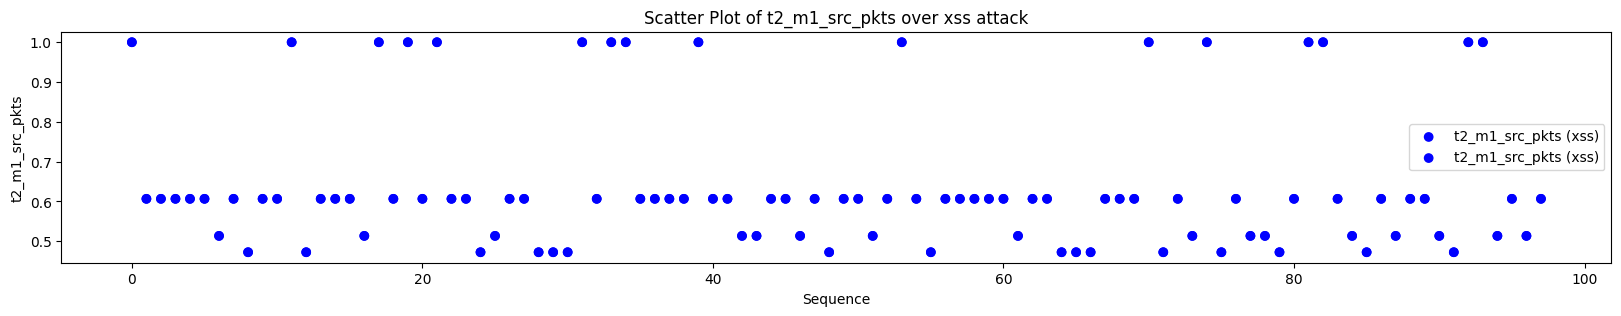

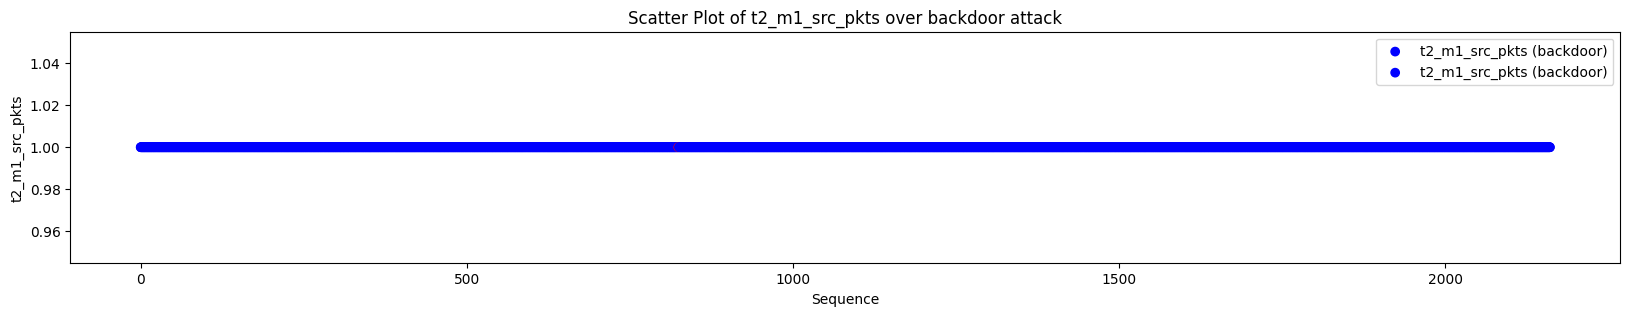

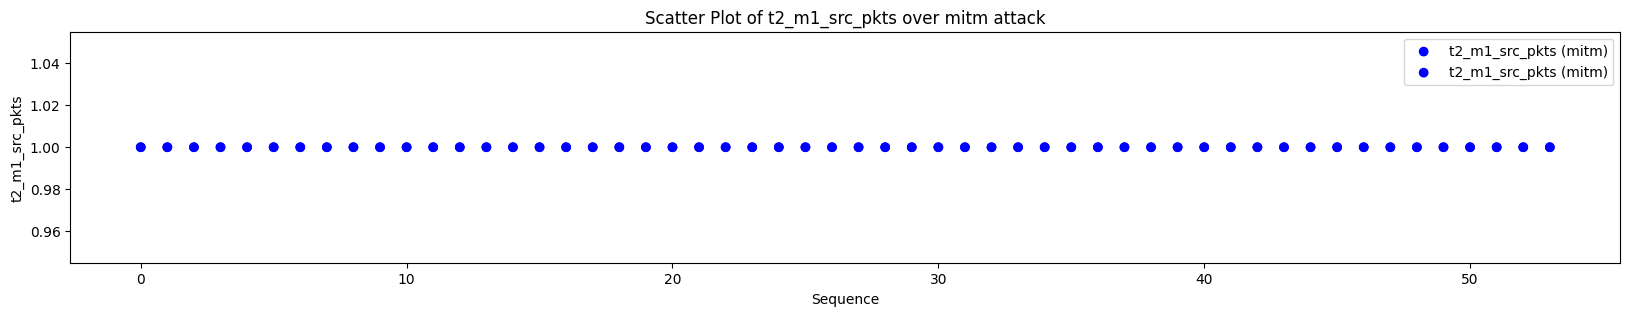

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df_topredict' is a predefined DataFrame with the necessary columns.

# Define the mapping of attack types
map_dict= { 'normal': 0, 'scanning': 1, 'dos': 2, 'ddos': 3, 'ransomware': 4, 'injection': 5, 'password': 6, 'xss': 7, 'backdoor':8, 'mitm':9}

# List of columns to plot
# columns_to_plot = ['t1_m1_src_pkts', 't1_m1_dst_pkts', 't2_m1_src_pkts', 't2_m1_dst_pkts']
columns_to_plot = ['t2_m1_src_pkts']

# Loop over each attack type in the map_dict except for 'normal'
for attack_name, attack_value in map_dict.items():
    if attack_value == 0:  # Skip the 'normal' type
        continue

    # Filter DataFrame where 'type' is either 0 or the current attack type
    df_topredict_tmp = testing_df.query('tw_actual_lbl ==' + str(attack_value))

    # Sequence for x-axis
    x_sequence = np.arange(0, len(df_topredict_tmp))

    for column in columns_to_plot:
        plt.figure(figsize=(20, 3))
        plt.scatter(x_sequence, df_topredict_tmp[column], 
                    c=np.where(df_topredict_tmp['tw_actual_lbl'] == df_topredict_tmp['tw_xmetrics_pred_lbl'], 'blue', 'red'), 
                    label=f"{column} ({'normal' if df_topredict_tmp['tw_actual_lbl'].iloc[0] == 0 else attack_name})")

        plt.scatter(x_sequence, df_topredict_tmp[column], 
                    c=np.where(df_topredict_tmp['tw_actual_lbl'] != df_topredict_tmp['tw_xmetrics_pred_lbl'], 'red', 'blue'), 
                    label=f"{column} ({'normal' if df_topredict_tmp['tw_actual_lbl'].iloc[0] == 0 else attack_name})")

        
        plt.title(f'Scatter Plot of {column} over {attack_name} attack')
        plt.xlabel('Sequence')
        plt.ylabel(column)
        plt.legend()
        plt.show()


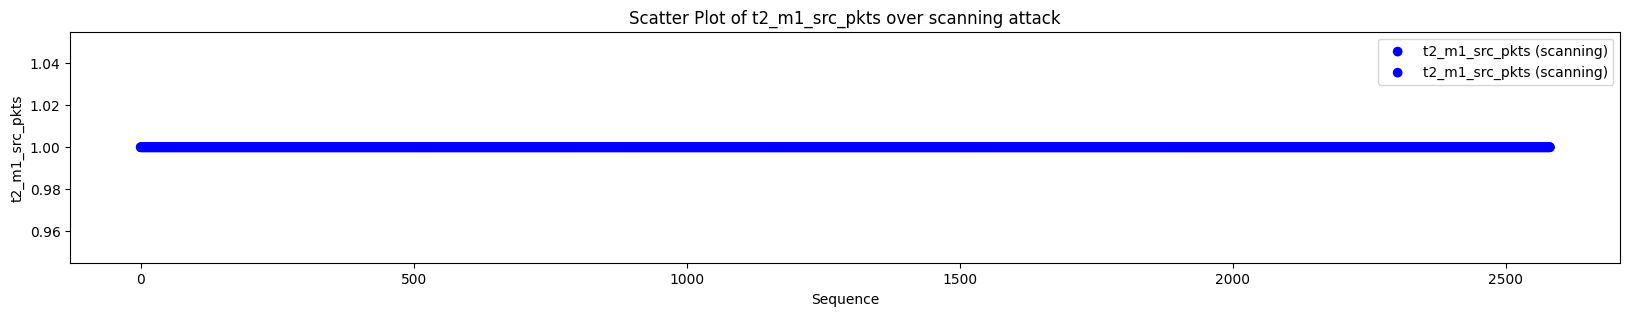

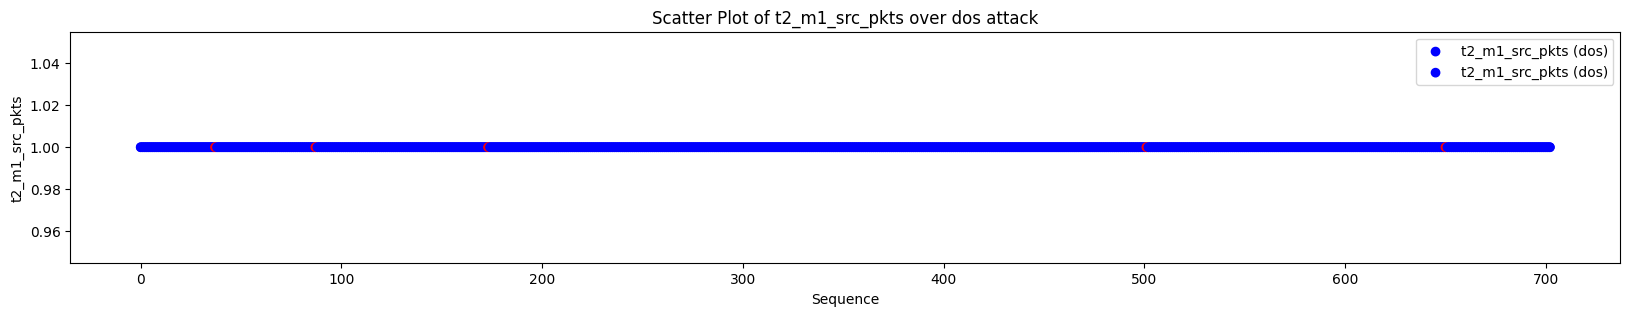

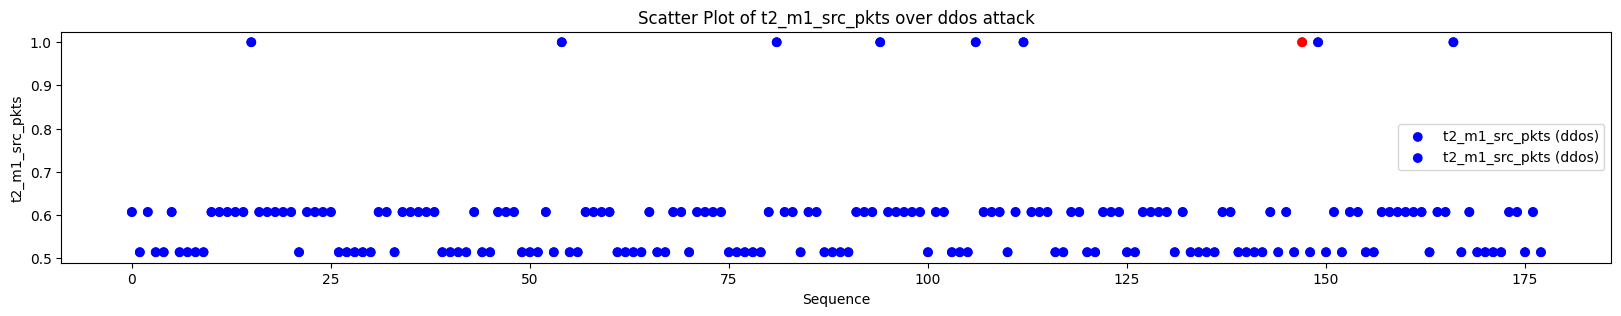

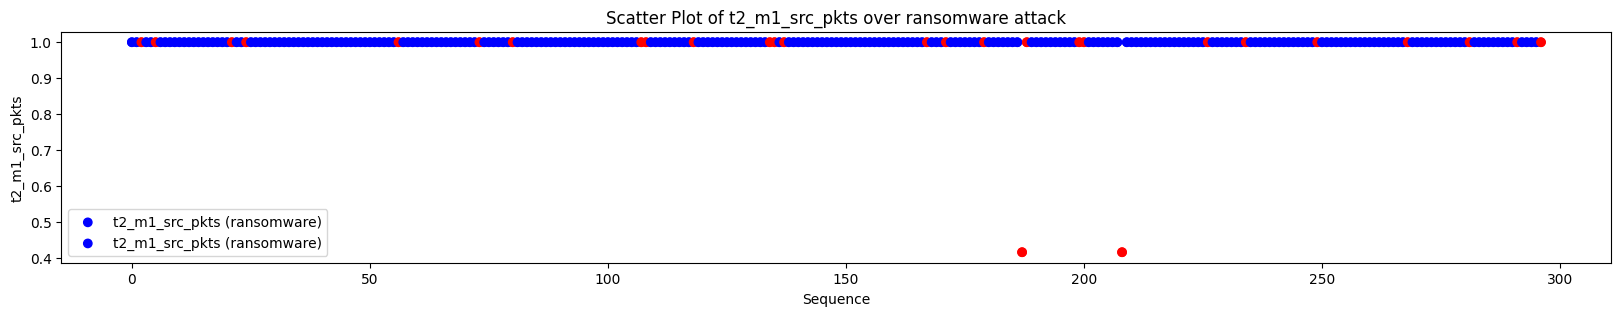

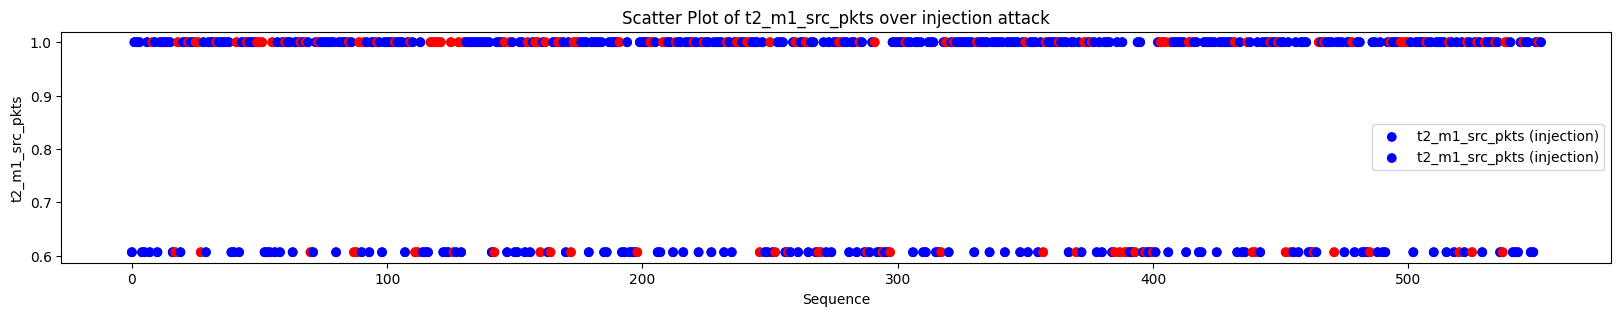

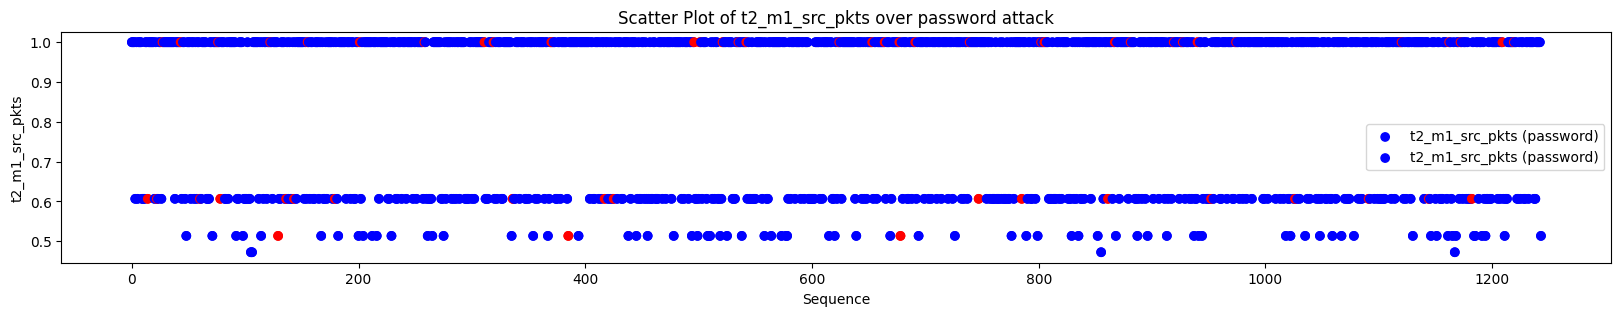

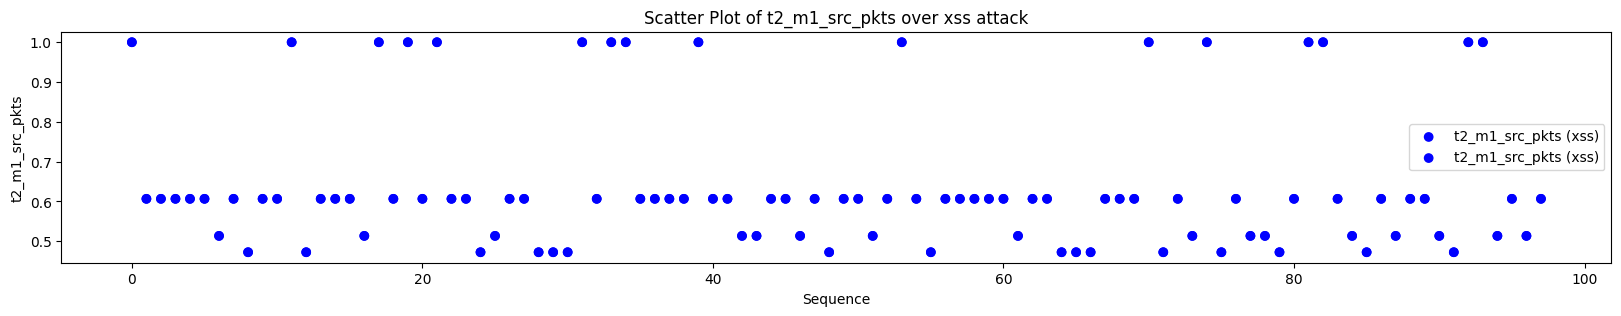

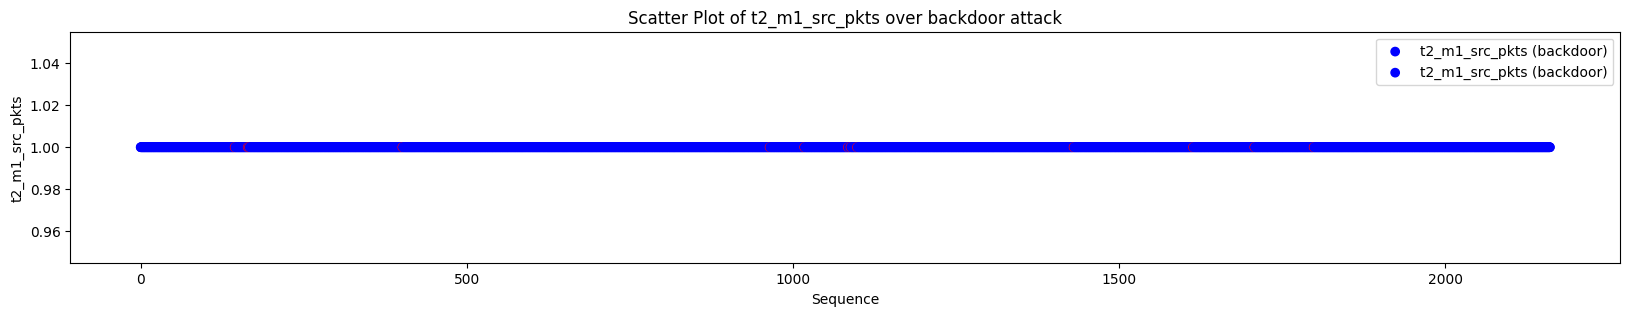

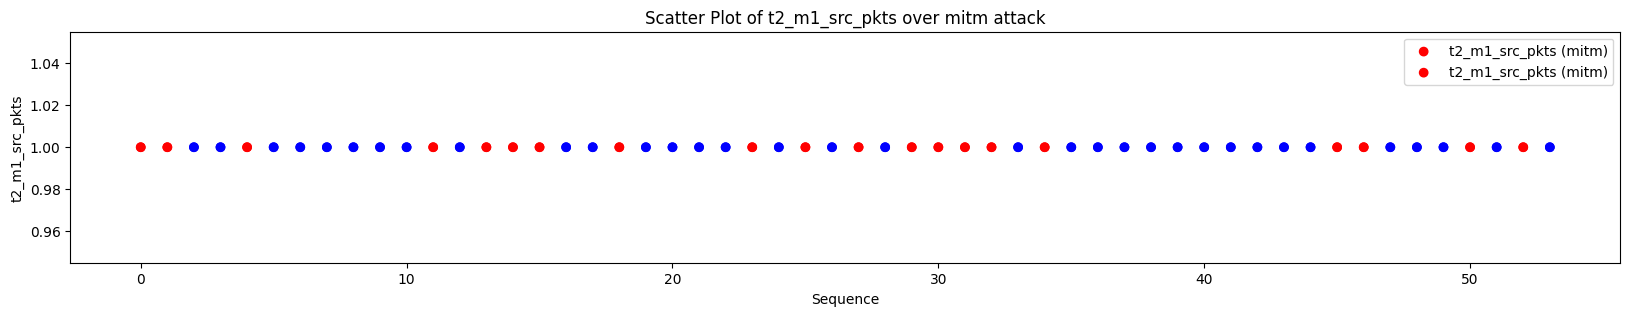

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df_topredict' is a predefined DataFrame with the necessary columns.

# Define the mapping of attack types
map_dict= { 'normal': 0, 'scanning': 1, 'dos': 2, 'ddos': 3, 'ransomware': 4, 'injection': 5, 'password': 6, 'xss': 7, 'backdoor':8, 'mitm':9}

# List of columns to plot
# columns_to_plot = ['t1_m1_src_pkts', 't1_m1_dst_pkts', 't2_m1_src_pkts', 't2_m1_dst_pkts']
columns_to_plot = ['t2_m1_src_pkts']

# Loop over each attack type in the map_dict except for 'normal'
for attack_name, attack_value in map_dict.items():
    if attack_value == 0:  # Skip the 'normal' type
        continue

    # Filter DataFrame where 'type' is either 0 or the current attack type
    df_topredict_tmp = testing_df.query('tw_actual_lbl ==' + str(attack_value))

    # Sequence for x-axis
    x_sequence = np.arange(0, len(df_topredict_tmp))

    for column in columns_to_plot:
        plt.figure(figsize=(20, 3))
        plt.scatter(x_sequence, df_topredict_tmp[column], 
                    c=np.where(df_topredict_tmp['tw_actual_lbl'] == df_topredict_tmp['tw_commonfeatures_pred_lbl'], 'blue', 'red'), 
                    label=f"{column} ({'normal' if df_topredict_tmp['tw_actual_lbl'].iloc[0] == 0 else attack_name})")

        plt.scatter(x_sequence, df_topredict_tmp[column], 
                    c=np.where(df_topredict_tmp['tw_actual_lbl'] != df_topredict_tmp['tw_commonfeatures_pred_lbl'], 'red', 'blue'), 
                    label=f"{column} ({'normal' if df_topredict_tmp['tw_actual_lbl'].iloc[0] == 0 else attack_name})")

        
        plt.title(f'Scatter Plot of {column} over {attack_name} attack')
        plt.xlabel('Sequence')
        plt.ylabel(column)
        plt.legend()
        plt.show()


In [144]:
import plotly.graph_objects as go

# Initialize a list to hold all the figures
figures = []

# A function to create figures for each score type and attack type
def create_figure(df, attack_type, score_type):
    df_filtered = df[df['approach_name'] != 'OD (numerical features)']
    fig = go.Figure()

    for classifier in df_filtered.query(f'attack_type == "{attack_type}"')['classifier'].unique():
        subset = df_filtered.query(f'attack_type == "{attack_type}"')[df_filtered.query(f'attack_type == "{attack_type}"')['classifier'] == classifier]
        fig.add_trace(go.Scatter(x=subset['approach_name'], y=subset[score_type], mode='lines+markers', name=classifier))

    # Add title and labels
    fig.update_layout(title=f'{score_type} by Approach and Classifier for ({attack_type})',
                      xaxis_title='Approach',
                      yaxis_title=f'{score_type}')

    return fig

# Create figures for each combination of attack type and score
attack_types = ['DDoS', 'DoS', 'Scanning', 'Ransomware', 'Injection', 'Password', 'XSS', 'Backdoor', 'MitM']
score_types = ['f1_score', 'balanced_accuracy', 'MCC', 'Precision', 'Recall']

for attack in attack_types:
    for score in score_types:
        fig = create_figure(df_scores, attack, score)
        figures.append(fig)

# Display all the figures
for fig in figures:
    fig.show()
